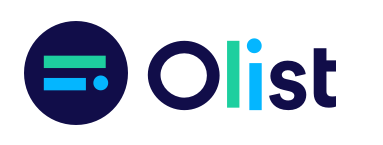

# 📚 <span style='color:#0D2BA5'>Mission - Segmentez des clients d'un site e-commerce</span>

# <font color='DodgerBlue'>SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'> 1.Préparation des données </a>
******    
### <a href="#C2"><font color='DodgerBlue'>2. Prise en main des jeux de données</a>
******    
   - <a href="#C3"><font color='RoyalBlue'>2.1 Customers </span>
   - <a href="#C4"><font color='RoyalBlue'>2.2 Geolocation</a>
   - <a href="#C5"><font color='RoyalBlue'>2.3 order_items - Articles commandés</a>
   - <a href="#C6"><font color='RoyalBlue'>2.4 order_payments - Paiements commandes</a>
   - <a href="#C7"><font color='RoyalBlue'>2.5 order_reviews - Avis sur les commandes</a>
   - <a href="#C8"><font color='RoyalBlue'>2.6 orders - Commandes</a>
   - <a href="#C9"><font color='RoyalBlue'>2.7 translation - Traduction des noms de catégorie</a>
   - <a href="#C10"><font color='RoyalBlue'>2.8 products - produits</a>
   - <a href="#C11"><font color='RoyalBlue'>2.9 sellers - Vendeurs</a>
   - <a href="#C12"><font color='RoyalBlue'>2.10 Bilan des jeux de données</a>
******    
### <a href="#C13"><font color='DodgerBlue'>3. Assemblage des jeux de données</a>
******    
### <a href="#C14"><font color='DodgerBlue'>4. Finalisation de jeux de données</a>
******
### <a href="#C15"><font color='DodgerBlue'>5. Analyse Exploratoire des données</a>
******
   - <a href="#C16"><font color='RoyalBlue'>5.1 Analyse univariée</a>
   - <a href="#C17"><font color='RoyalBlue'>5.2 Analyse multivariée</a>
******    
### <a href="#C18"><font color='DodgerBlue'>6. Export des données</a>

<font color='DodgerBlue'>***Problématique***
- **Comment segmenter efficacement les clients d'Olist pour optimiser les campagnes de communication et améliorer la satisfaction client ?**
******
<font color='DodgerBlue'>***Contexte***
- Olist, une entreprise brésilienne spécialisée dans la vente sur marketplaces en ligne, renforce son équipe Data pour améliorer son approche marketing et la gestion de l'expérience client. Je suis engagé comme consultant Data pour les aider à réaliser une segmentation client.
******
<font color='DodgerBlue'>***Mission***
- Développer un modèle de segmentation des clients d'Olist en utilisant des méthodes de clustering non supervisé. Cette segmentation doit permettre de distinguer différents types de clients basés sur leur comportement d'achat et leur satisfaction, afin de fournir à l'équipe marketing des groupes ciblés pour des actions marketing personnalisées.
*****
<font color='DodgerBlue'>***Objectif***
- Comprendre les différents types de clients d'Olist à travers une analyse exploratoire des données.
- Segmenter les clients en utilisant une méthode de clustering pour identifier des groupes distincts.
- Fournir des descriptions actionnables de chaque segment pour une utilisation par l'équipe marketing.
- Recommander une fréquence de mise à jour pour le modèle afin de maintenir la pertinence des segments au fil du temps.

# <a name="C1"><font color='RoyalBlue'> 1. Préparation des données</a>

In [1]:
# Chargement des librairies
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sys
import os
# Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly
from scipy.stats import chi2_contingency, chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from datetime import datetime
from datetime import timedelta


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import Image
import pickle

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 1000)  

In [3]:
# Définition des dossiers : 
dossier_donnees = 'olist_donnees'
dossier_sauvegarde = '2. Sauvegardes'

In [4]:
# Importation des fichiers dans un dictionnaire : 
ls_fichier = [fichier for fichier in os.listdir(dossier_donnees) if fichier.endswith('.csv')]
dataframes = {}

for nom in ls_fichier:
    chemin = os.path.join(dossier_donnees, nom)
    nom_dataframe = os.path.splitext(nom)[0] 
    df = pd.read_csv(chemin)
    dataframes[nom_dataframe] = df

print("Dataframes importés dans le dictionnaire dataframes :\n")

for nom in dataframes.keys():
    print(f"- {nom}")

del ls_fichier, nom, chemin, nom_dataframe, df

Dataframes importés dans le dictionnaire dataframes :

- customers
- geolocation
- orders
- order_items
- order_payments
- order_reviews
- products
- product_category_name_translation
- sellers


In [5]:
customers = dataframes['customers']
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# <a name="C2"><font color='RoyalBlue'> 2. Prise en main des jeux de données</a>

### <a name="C3"><span style='background:PowderBlue'>***2.1 Customers***</span>

- ***Le jeu de données customers contient des informations anonymisées sur les clients d'Olist, incluant leurs identifiants uniques, leurs coordonnées géographiques (ville, état), et les détails de leur historique de commandes, utilisés pour analyser et segmenter les clients selon leur comportement d'achat et leur localisation.***

In [6]:
# Création du dataframe : 
customers = dataframes['customers'].copy()

In [7]:
# Taille : nombre de lignes/colonnes
nRow, nVar = customers.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 99441 lignes et 5 variables.


In [8]:
customers.shape

(99441, 5)

**Compréhension des variables**
***
- **customer_id :** Identifiant unique attribué à chaque commande réalisée(Un client peut avoir plusieurs customer_id si ce client a passé plusieurs commandes.)
- ***customer_id peut identifier différentes commandes d'un même client.***
- **customer_unique_id :** Identifiant unique à chaque client
- ***customer_unique_id identifie un client unique.***
- **customer_zip_code_prefix :** Code postal de la ville du client
- **customer_city :** Ville de résidence du client   
- **customer_state :** Nom de l'Etat où réside le client   

In [9]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = customers.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = customers.notnull().sum() #count de values non nulls
    desc['unique'] = customers.nunique() # nombre de values unique
    desc['dtype'] = customers.dtypes # type de données dans chque colonne
    desc['count_null']=customers.isna().sum() #count de valeurs nulls
    desc['null%']=round((customers.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=customers.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [10]:
#Appel à la fonction
(decrire_dataframe(customers).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,customer_id,99441,99441,object,0,0.000000,0
1,customer_unique_id,99441,96096,object,0,0.000000,0
2,customer_zip_code_prefix,99441,14994,int64,0,0.000000,0
3,customer_city,99441,4119,object,0,0.000000,0
4,customer_state,99441,27,object,0,0.000000,0


<font color='RoyalBlue'>***Le tableau fournit un résumé du "customers", qui contient 99 441 entrées avec des informations détaillées sur chaque commande et client, sans aucune valeur manquante.***
****
<font color='RoyalBlue'>***Il révèle que certains clients ont effectué plusieurs achats (96 096 identifiants uniques sur 99 441 entrées), avec une large répartition géographique indiquée par 14 994 codes postaux uniques.***

#### <font color='Blue'>"customer_id" et "customer_unique_id"

In [11]:
# Identifiants unique 'customer_unique_id' ayant plusieurs identifiant'customer_id'
df_unique= pd.DataFrame(customers.groupby('customer_unique_id')
                              [['customer_id']].count()['customer_id']
                              .sort_values(ascending=False))
#clients qui ont passé plus d'une commande
df_unique[df_unique['customer_id'] > 1]

,customer_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5cfc9643603c095fd7ed86a50fa17887,2
cfb025f193db116549c9c23e4d58e3e3,2
609b7feab0f0c9726929ec4891447b02,2


- Certains clients **(customer_unique_id) ont passé plusieurs commandes distinctes**, comme le client "8d50f5eadf50201cccdedfdb9e2ac8455" avec 17 commandes (customer_id).

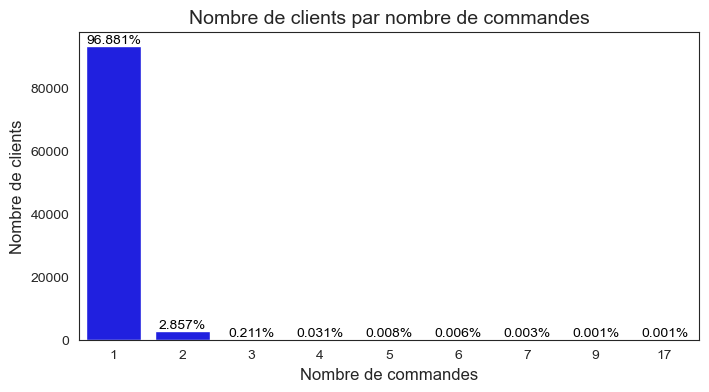

In [12]:
# Préparation des données
nb_client = customers['customer_unique_id'].nunique()
series_commande_par_client = customers.groupby('customer_unique_id').size().value_counts()
df_visu_commandes = pd.DataFrame({
    'Nb_commandes': series_commande_par_client.index,
    'Nb_clients': series_commande_par_client.values
})
df_visu_commandes['%'] = round((df_visu_commandes['Nb_clients'] * 100) / nb_client, 3)

# Configuration du style du graphique
sns.set_style("white")

# Création du barplot
plt.figure(figsize=(8, 4))
ax1 = sns.barplot(x='Nb_commandes', y='Nb_clients', data=df_visu_commandes, color='Blue')
ax1.set_xlabel('Nombre de commandes', fontsize=12)
ax1.set_ylabel('Nombre de clients', fontsize=12)
ax1.set_title('Nombre de clients par nombre de commandes', fontsize=14)

# Ajout des annotations sur les barres
for i, p in enumerate(ax1.patches):
    ax1.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{df_visu_commandes["%"][i]}%', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.show()

- ***La grande majorité des clients (96.881%) n'ont passé qu'une seule commande, tandis qu'un pourcentage très faible de clients a passé plusieurs commandes, allant jusqu'à un maximum de 17 commandes pour un client.***

#### <font color='Blue'>"customer_zip_code_prefix" 

In [13]:
# Transformation de int64 en object et suppression '.0'
customers['customer_zip_code_prefix'] = \
    customers['customer_zip_code_prefix'] \
    .astype('object') \
    .apply(lambda x: str(x).replace('.0', ''))
# Compléter le code postal par des zéros à gauche pour contenir 5 chiffres
customers['customer_zip_code_prefix'] = \
    customers['customer_zip_code_prefix'].str.rjust(5, '0')

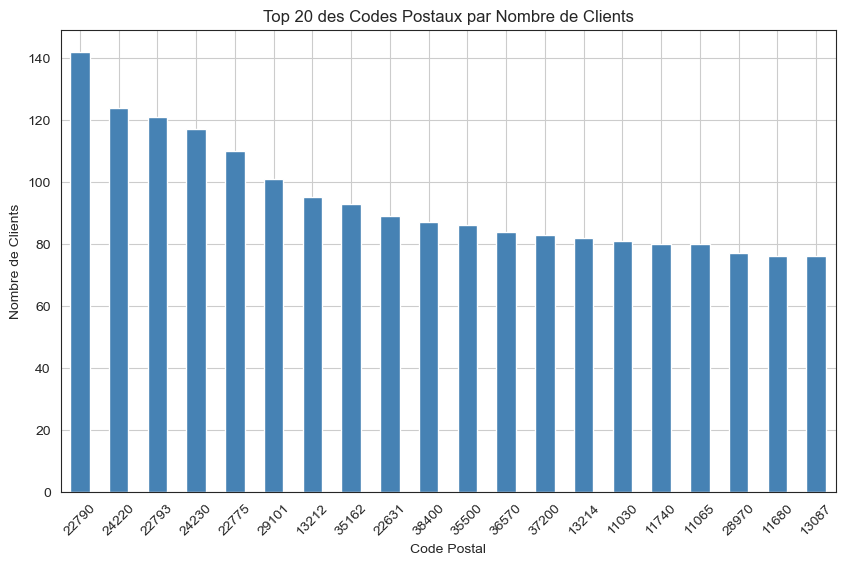

In [14]:
# Calculer le nombre de clients par code postal
zip_code_counts = customers['customer_zip_code_prefix'].value_counts().head(20)

# Créer un graphique à barres pour visualiser les 20 codes postaux les plus fréquents
plt.figure(figsize=(10, 6))
zip_code_counts.plot(kind='bar', color='steelblue')
plt.title('Top 20 des Codes Postaux par Nombre de Clients')
plt.xlabel('Code Postal')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### <font color='Blue'>"customer_city"

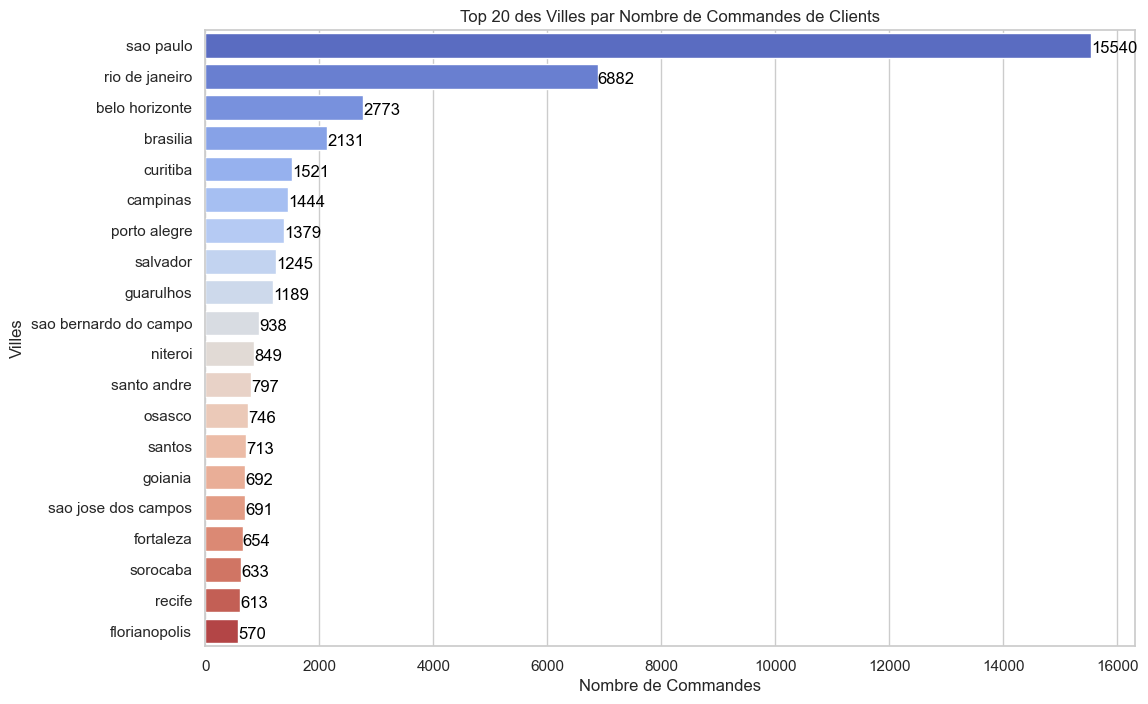

In [15]:
# Compter le nombre de commandes par ville
city_order_counts = customers['customer_city'].value_counts().head(20)

# Configuration du style du graphique
sns.set(style="whitegrid")

# Création du graphique à barres
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=city_order_counts.values, y=city_order_counts.index, palette='coolwarm')
plt.title('Top 20 des Villes par Nombre de Commandes de Clients')
plt.xlabel('Nombre de Commandes')
plt.ylabel('Villes')

# Ajouter des annotations pour chaque barre
for i, v in enumerate(city_order_counts.values):
    ax.text(v + 3, i + 0.1, str(v), color='black', va='center')

plt.show()

#### <font color='Blue'>"customer_state"

***5 régions et 27 états du Brésil*** 

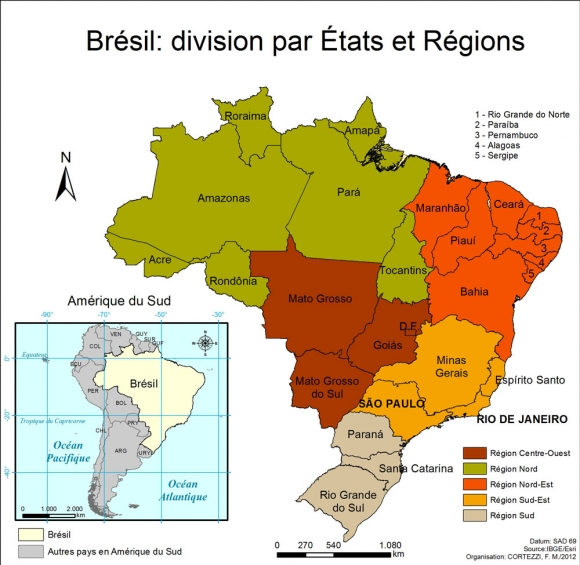

In [16]:
display(Image(filename='carte-du-bresil-avec-les-divisions-des-etats-et-regions.jpg'))

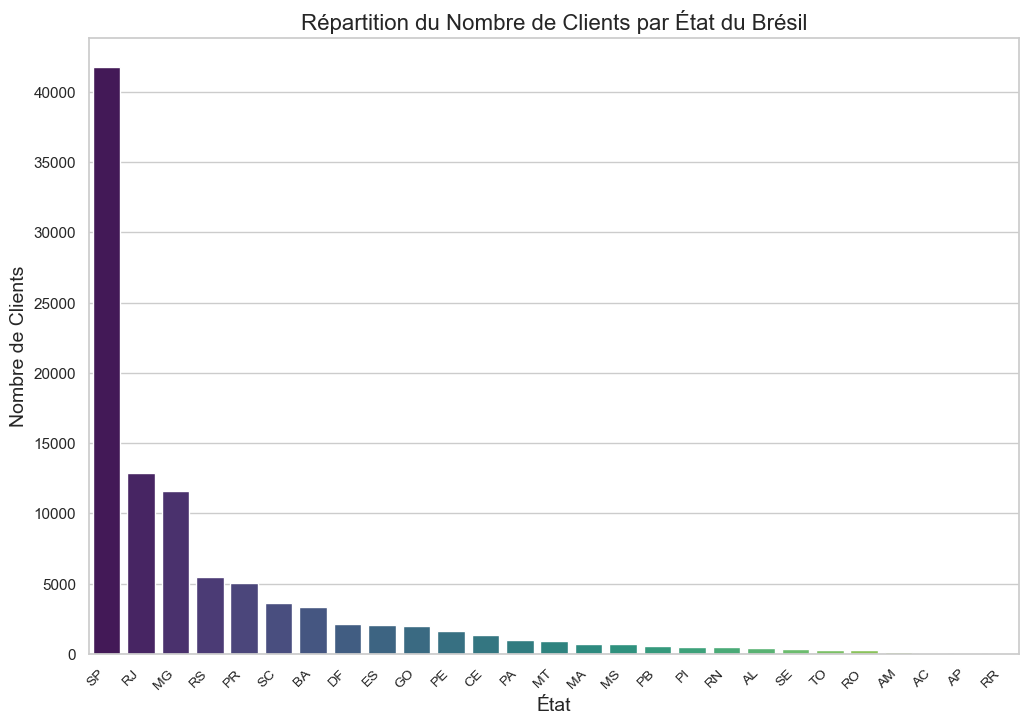

In [17]:
# Compter le nombre de clients par état
state_counts = customers['customer_state'].value_counts().sort_values(ascending=False)

# Configurer l'apparence des graphiques
sns.set(style="whitegrid")

# Création du graphique à barres
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')

# Ajouter des titres et des labels
plt.title('Répartition du Nombre de Clients par État du Brésil', fontsize=16)
plt.xlabel('État', fontsize=14)
plt.ylabel('Nombre de Clients', fontsize=14)

# Améliorer la lisibilité des étiquettes sur l'axe des x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Afficher le graphique
plt.show()

- ***D'après le graphique ,on constate que la plupart des clients sont localisés dans les 3 états :***
- SP : São Paulo,
- RJ : Rio de Janeiro,
- et MG : Minas Gerais.

**Bilan**
***
- Toutes ces variables concernent le **client** et seront donc utiles pour notre analyse ciblée 'Client', pas de doublons, pas de valeurs manquantes, le jeu de données est prêt pour la fusion avec les autres jeux de données.
****
- Deux variables sont utilisées pour identifier les clients : 
    - **customer_id** est un jeton d'identification du client qui est généré pour chaque commande. Si le même client passe plusieurs commandes, il possède plusieurs identifiants 'customer_id'. 
    - **customer_unique_id** qui est unique à chaque client et peut être utilisé pour suivre leurs achats dans le temps.

- ***Le client est au coeur de l'étude de segmentation de clientèles, toutes les variables seront conservées.***

### <a name="C4"><span style='background:PowderBlue'>***2.2 Geolocation***</span>

- ***Le jeu de données geolocation comprend les coordonnées géographiques (latitude et longitude) et les codes postaux associés aux adresses au Brésil, permettant de situer précisément les clients et les vendeurs sur la carte.***

In [18]:
# Création du dataframe : 
geolocation = dataframes['geolocation'].copy()

In [19]:
# Taille : nombre de lignes/colonnes
nRow, nVar = geolocation.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 1000163 lignes et 5 variables.


In [20]:
geolocation.shape

(1000163, 5)

**Compréhension des variables**
****
- **geolocation_zip_code_prefix :** Code postal
- **geolocation_lat :** Latitude (Utile pour localiser le client) 
- **geolocation_lng :** Longitude (Utile pour localiser le client) 
- **geolocation_city :** ville de client
- **geolocation_state :** Nom de l'Etat où réside le client 

In [21]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = geolocation.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = geolocation.notnull().sum() #count de values non nulls
    desc['unique'] = geolocation.nunique() # nombre de values unique
    desc['dtype'] = geolocation.dtypes # type de données dans chque colonne
    desc['count_null']=geolocation.isna().sum() #count de valeurs nulls
    desc['null%']=round((geolocation.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=geolocation.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [22]:
#Appel à la fonction
(decrire_dataframe(geolocation).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,geolocation_zip_code_prefix,1000163,19015,int64,0,0.000000,390005
1,geolocation_lat,1000163,717360,float64,0,0.000000,390005
2,geolocation_lng,1000163,717613,float64,0,0.000000,390005
3,geolocation_city,1000163,8011,object,0,0.000000,390005
4,geolocation_state,1000163,27,object,0,0.000000,390005


#### <font color='Blue'>"geolocation_zip_code_prefix"

- ***Le code postal de la ville de résidence du client doit être composé de 5 chiffres et transformé en object.***

In [23]:
# Transformation de int64 en object et suppression '.0'
geolocation['geolocation_zip_code_prefix'] = \
    geolocation['geolocation_zip_code_prefix'] \
    .astype('object').apply(lambda x: str(x).replace('.0', ''))
# Compléter le code postal par des zéros à gauche pour contenir 5 chiffres
geolocation['geolocation_zip_code_prefix'] = \
    geolocation['geolocation_zip_code_prefix'].str.rjust(5, '0')

In [24]:
geolocation['geolocation_zip_code_prefix'].describe()

count     1000163
unique      19015
top         24220
freq         1146
Name: geolocation_zip_code_prefix, dtype: object

#### <font color='Blue'>'geolocation_lat - Latitude' et 'geolocation_lng _ longitude'

In [25]:
# regroupement par code postal 
# Regrouper les latitudes/longitudes par leurs moyennes
geolocation = geolocation.groupby('geolocation_zip_code_prefix') \
    .agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean',
          'geolocation_city': 'first', 'geolocation_state': 'first'}) \
    .reset_index()
# Vérification
geolocation['geolocation_zip_code_prefix'].nunique()

19015

- ***La moyenne des latitudes et longitudes fournit un point central approximatif pour chaque code postal.***
- ***Existance de plusieurs latitudes/longitudes différentes pour un code postal donné .***
- ***C'est une information utile pour localiser la ville de résidence du client.***

#### <font color='Blue'>'geolocation_state'

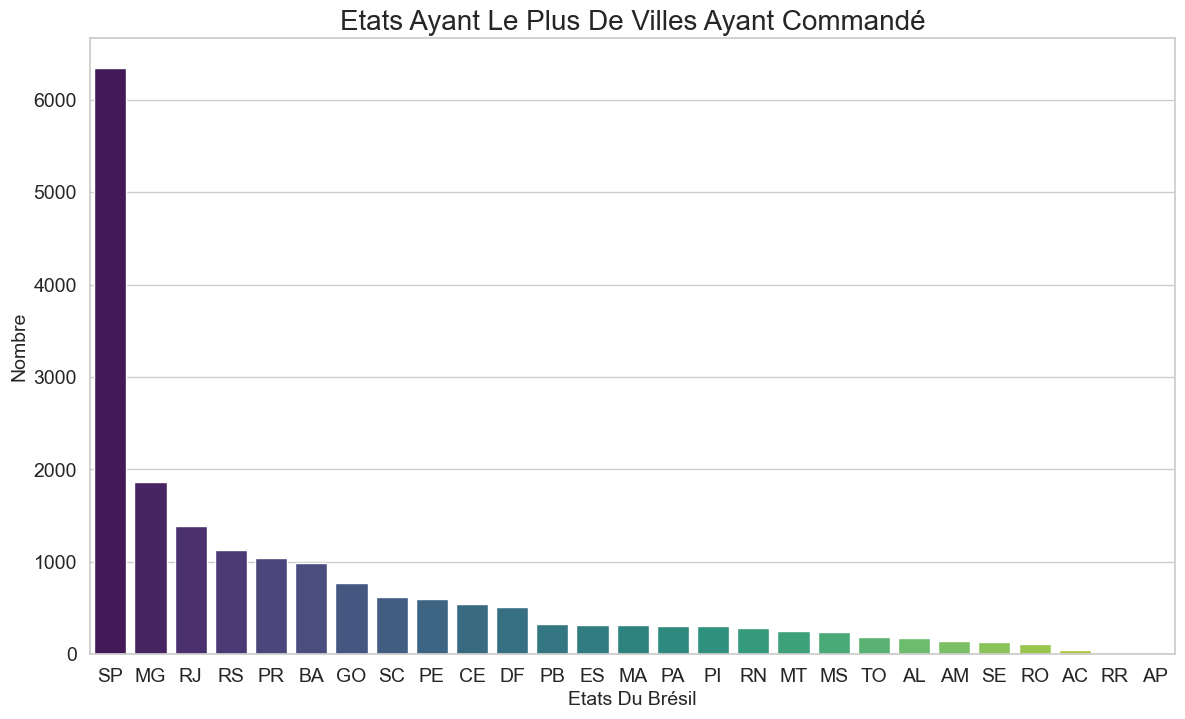

In [26]:
# Répartition du nombre de clients par état du Brésil
# Countplot
plt.figure(figsize=(14, 8))
sns.countplot(x='geolocation_state', data=geolocation,
              order=geolocation['geolocation_state'].value_counts(
              ).sort_values(ascending=False).index,
              palette='viridis')

plt.title('Etats ayant le plus de villes ayant commandé'.title(),
          fontsize=20)
plt.ylabel('Nombre'.title(), fontsize=14)
plt.xlabel('Etats du Brésil'.title(), fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- ***État correspondant au code postal.'geolocation_state' est redondante avec la donnée 'customer_state' du jeu de données cutomers, elle n'est donc pas utile pour la fusion ==> à supprimer de geolocation.***

In [27]:
# Suppression de la variable 'geolocation_state' 
geolocation.drop(columns=['geolocation_state'], inplace=True)

#### <font color='Blue'>'geolocation_city'

In [28]:
# Suppression de la variable 'geolocation_city' car elle est redondante avec  la donnée 'customer_city'
geolocation.drop(columns=['geolocation_city'], inplace=True)

**Bilan**
***
- Pas de valeurs manquantes.
- Les variables inutiles à notre étude ont été supprimées :
- 'geolocation_city',
- 'geolocation_state

In [29]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,01001,-23.550190,-46.634024
1,01002,-23.548146,-46.634979
2,01003,-23.548994,-46.635731
3,01004,-23.549799,-46.634757
4,01005,-23.549456,-46.636733


### <a name="C5"><span style='background:PowderBlue'>***2.3 order_items - Articles commandés***</span>

- ***order_items comprend les données sur les articles achetés dans le cadre de chaque commande.***

In [30]:
# Création du dataframe : 
order_items = dataframes['order_items'].copy()

In [31]:
# Taille : nombre de lignes/colonnes
nRow, nVar = order_items.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 112650 lignes et 7 variables.


In [32]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


**Compréhension des variables**
***
- **order_id :** identifiant unique de la commande 
- **order_item_id :** Identifiant unique de l'article dans la commande 
- ***un order_id peut contenir plusieurs order_item_id***
- **product_id :** identifiant unique du produit 
- **seller_id :** identifiant unique du vendeur  
- **shipping_limit_date :** Date limite à laquelle le vendeur doit expédier le produit 
- **price :** Prix du produit   
- **freight_value :** Frais de port pour l'expédition du produit 

In [33]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = order_items.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = order_items.notnull().sum() #count de values non nulls
    desc['unique'] = order_items.nunique() # nombre de values unique
    desc['dtype'] = order_items.dtypes # type de données dans chque colonne
    desc['count_null']=order_items.isna().sum() #count de valeurs nulls
    desc['null%']=round((order_items.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=order_items.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [34]:
#Appel à la fonction
(decrire_dataframe(order_items).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,order_id,112650,98666,object,0,0.000000,0
1,order_item_id,112650,21,int64,0,0.000000,0
2,product_id,112650,32951,object,0,0.000000,0
3,seller_id,112650,3095,object,0,0.000000,0
4,shipping_limit_date,112650,93318,object,0,0.000000,0
5,price,112650,5968,float64,0,0.000000,0
6,freight_value,112650,6999,float64,0,0.000000,0


#### <font color='Blue'>'order_id'/'order_item_id'

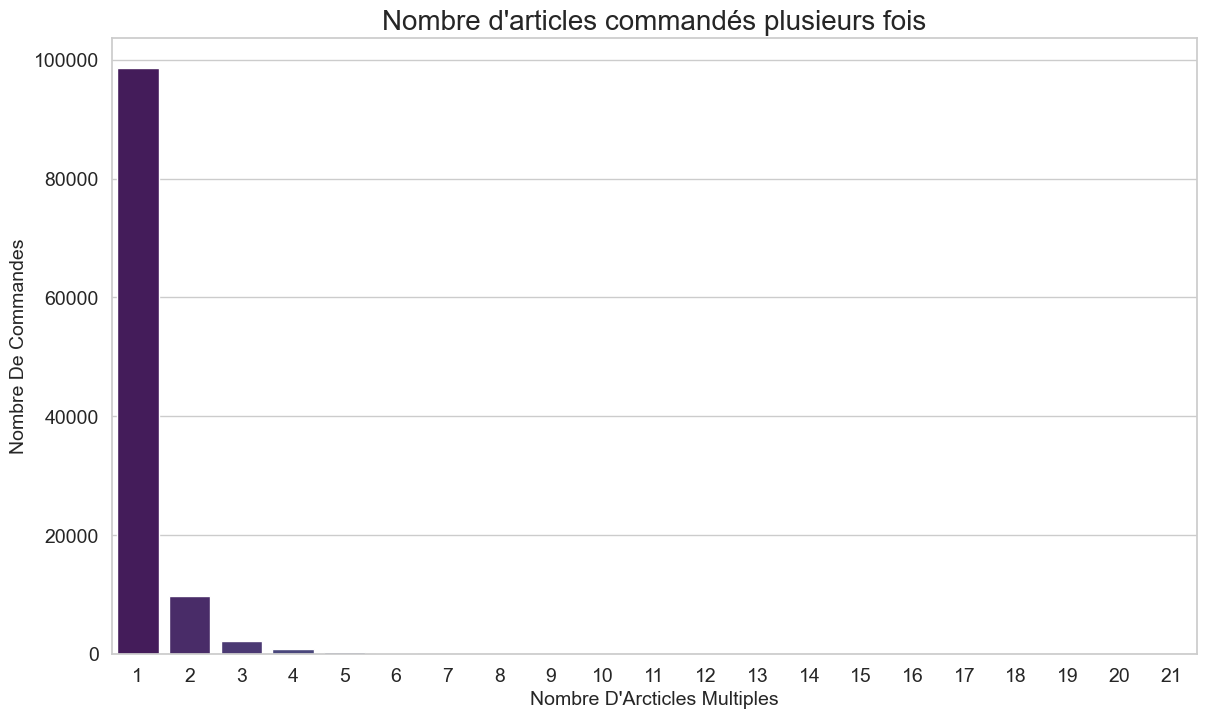

In [35]:
# Répartition du nombre d'articles commandés plusieurs fois
serie_item_id = order_items['order_item_id'].value_counts()

# Countplot
plt.figure(figsize=(14, 8))
sns.barplot(x=serie_item_id.index, y=serie_item_id.values,
            palette='viridis')

plt.title('Nombre d\'articles commandés plusieurs fois', fontsize=20)
plt.ylabel('Nombre de commandes'.title(), fontsize=14)
plt.xlabel('Nombre d\'arcticles multiples'.title(), fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- ***Ce graphique montre la répartition du nombre d'articles commandés plusieurs fois dans une seule commande.*** 
- ***La majorité des commandes contiennent un seul article, tandis que le nombre de commandes avec plusieurs articles diminue rapidement, indiquant que les clients commandent rarement plusieurs exemplaires du même article.***

#### <font color='Blue'>'shipping_limit_date'/'price'

In [36]:
# Transformer shipping_limit_date de object en Datetime
order_items['shipping_limit_date'] = pd.to_datetime(
    order_items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

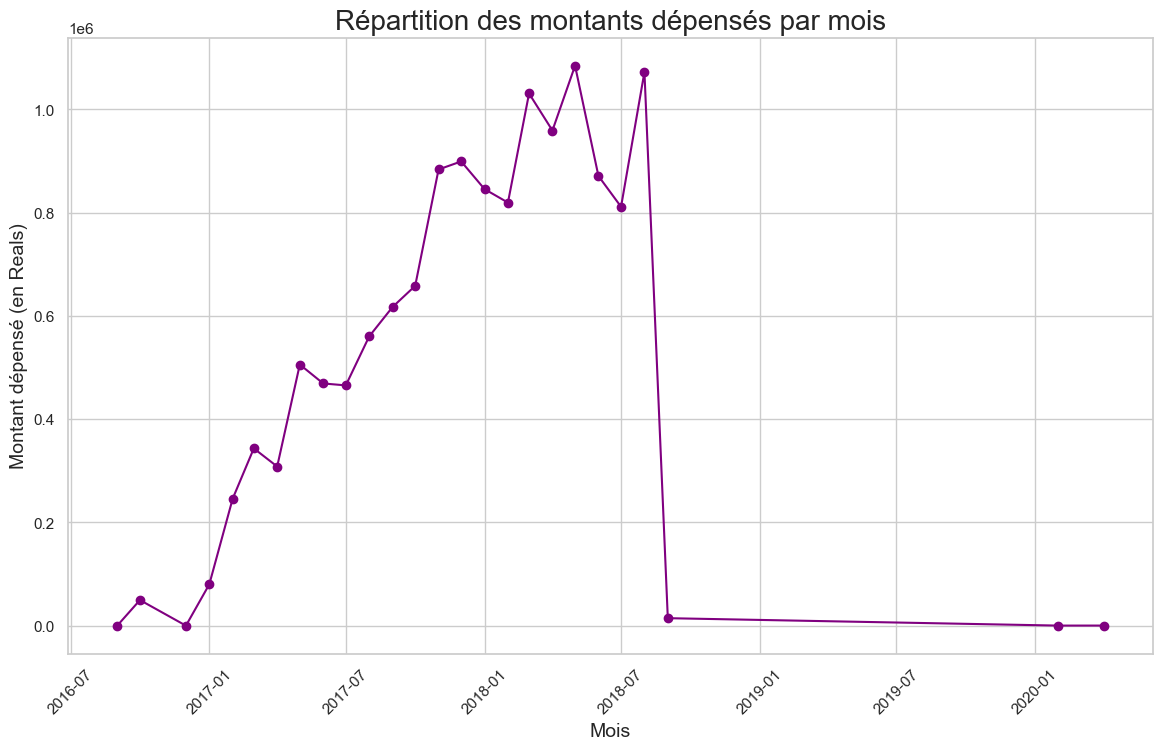

In [37]:
# Extraire le mois et l'année de 'shipping_limit_date'
order_items['annee_mois'] = order_items['shipping_limit_date'].dt.to_period('M')

# Agréger les montants dépensés par mois
depenses_mensuelles = order_items.groupby('annee_mois')['price'].sum().reset_index()

# Convertir 'annee_mois' en datetime pour l'affichage
depenses_mensuelles['annee_mois'] = depenses_mensuelles['annee_mois'].dt.to_timestamp()

# Visualiser les résultats
plt.figure(figsize=(14, 8))
plt.plot(depenses_mensuelles['annee_mois'], depenses_mensuelles['price'], marker='o', color='purple')
plt.title('Répartition des montants dépensés par mois', fontsize=20)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Montant dépensé (en Reals)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- ***Le graphique illustre l'évolution des dépenses mensuelles sur la plateforme Olist de mi-2016 à début 2020.***
- On observe une croissance soutenue jusqu'à mi-2018, suivie d'une chute significative, probablement due à une instabilité économique,incertitude politique et de la concurrence accrue qui a affecté les habitudes d'achat des consommateurs.
- Après cette période, les dépenses se stabilisent à un niveau inférieur, indiquant une adaptation à la nouvelle situation économique.

**Bilan**:
***
- nombre d'articles commandés plusieurs fois dans une seule commande.

### <a name="C6"><span style='background:PowderBlue'>***2.4 order_payments - Paiements commandes***</span>

- ***order_payments est l'ensemble des données sur les options de paiement des commandes.***

In [38]:
# Création du dataframe : 
order_payments = dataframes['order_payments'].copy()

In [39]:
# Taille : nombre de lignes/colonnes
nRow, nVar = order_payments.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 103886 lignes et 5 variables.


In [40]:
order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


**Compréhension des variables**
***
- **order_id :** identifiant unique d'une commande. 
- **payment_sequential :** un client peut payer une commande avec plus d'un mode de paiement. 
- **payment_type :** le mode de paiement choisi par le client. 
- **payment_installments :** nombre de versements choisis par le client. 
- **payment_valu :** valeur de transaction. 

In [41]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = order_payments.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = order_payments.notnull().sum() #count de values non nulls
    desc['unique'] = order_payments.nunique() # nombre de values unique
    desc['dtype'] = order_payments.dtypes # type de données dans chque colonne
    desc['count_null']=order_payments.isna().sum() #count de valeurs nulls
    desc['null%']=round((order_payments.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=order_payments.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [42]:
#Appel à la fonction
(decrire_dataframe(order_payments).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,order_id,103886,99440,object,0,0.000000,0
1,payment_sequential,103886,29,int64,0,0.000000,0
2,payment_type,103886,5,object,0,0.000000,0
3,payment_installments,103886,24,int64,0,0.000000,0
4,payment_value,103886,29077,float64,0,0.000000,0


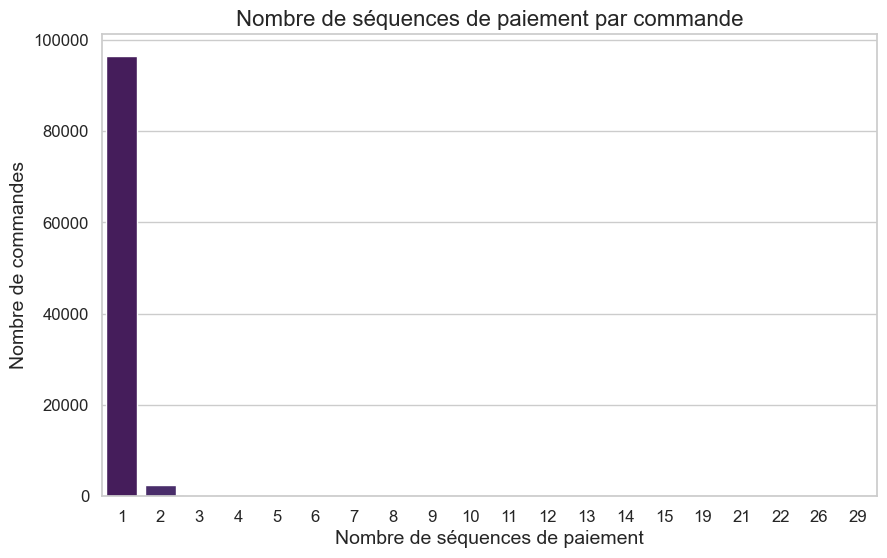

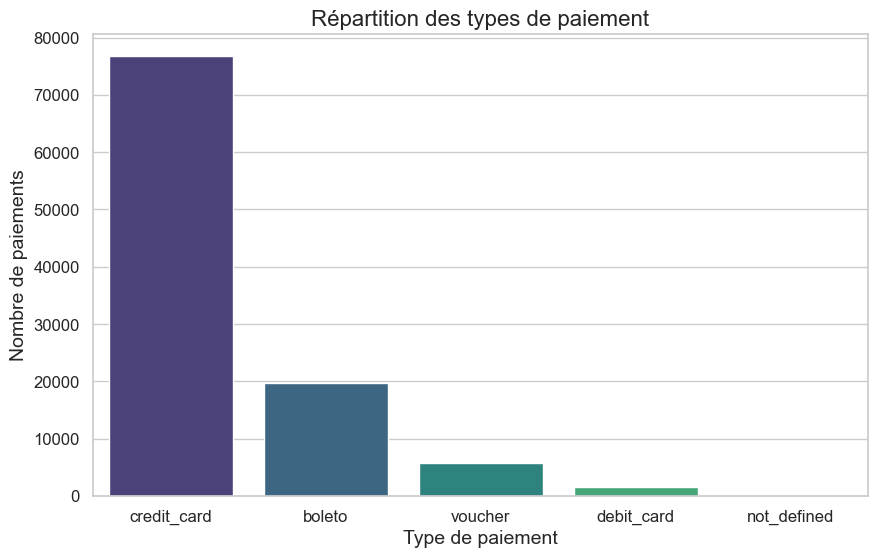

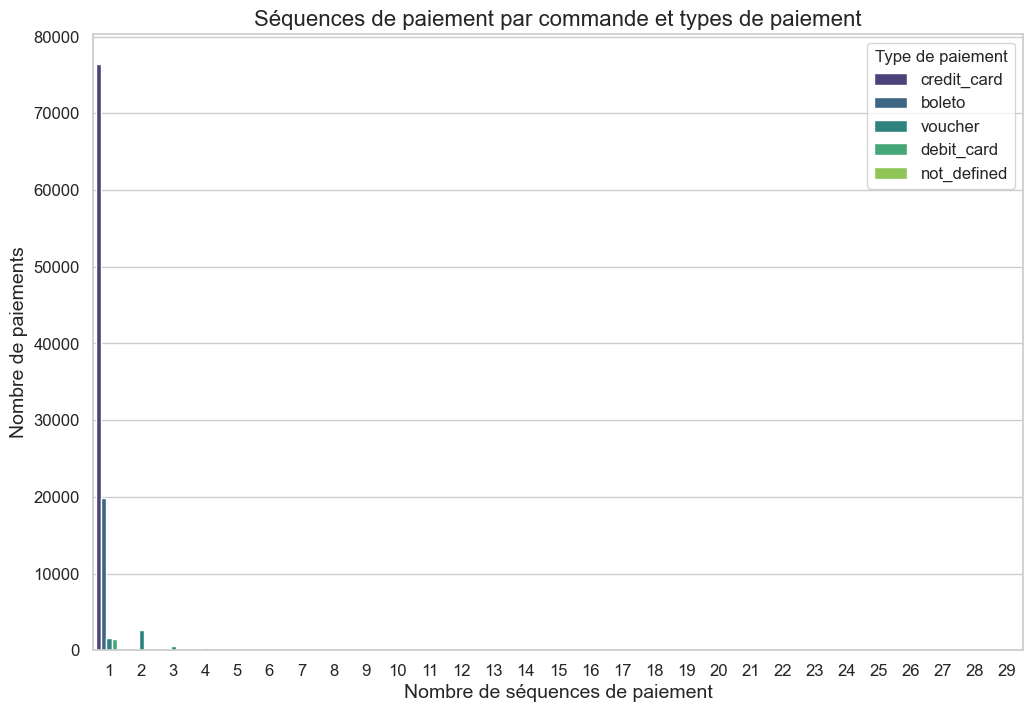

In [43]:
#Visualisation des Séquences de Paiement sur Olist
#---------------------------------------------------

# Compter les séquences de paiement par commande
payment_seq_counts = order_payments.groupby('order_id')['payment_sequential'].max()

# Visualisation du nombre de séquences de paiement par commande
plt.figure(figsize=(10, 6))
sns.countplot(x=payment_seq_counts, palette='viridis')
plt.title('Nombre de séquences de paiement par commande', fontsize=16)
plt.xlabel('Nombre de séquences de paiement', fontsize=14)
plt.ylabel('Nombre de commandes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#--------------------------------------------------------

# Répartition des types de paiement
plt.figure(figsize=(10, 6))
sns.countplot(data=order_payments, x='payment_type', palette='viridis', order=order_payments['payment_type'].value_counts().index)
plt.title('Répartition des types de paiement', fontsize=16)
plt.xlabel('Type de paiement', fontsize=14)
plt.ylabel('Nombre de paiements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#--------------------------------------------------------

# Visualisation combinée : nombre de séquences de paiement par commande et type de paiement
plt.figure(figsize=(12, 8))
sns.countplot(data=order_payments, x='payment_sequential', hue='payment_type', palette='viridis')
plt.title('Séquences de paiement par commande et types de paiement', fontsize=16)
plt.xlabel('Nombre de séquences de paiement', fontsize=14)
plt.ylabel('Nombre de paiements', fontsize=14)
plt.legend(title='Type de paiement', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- **Graph 1 :** La majorité des commandes sont réglées en une seule séquence de paiement. Quelques commandes utilisent deux ou plus de séquences, mais elles sont très rares.
- **Graph 2 :** La carte de crédit est de loin le mode de paiement le plus utilisé, suivie par billets. 
- **Graph 3 :**  On voit que la majorité des paiements par carte de crédit sont effectués en une seule séquence

**Bilan**
***
- Un client peut payer avec plusieurs moyens de paiement 
- Un client peut payer en plusieurs fois.

### <a name="C7"><span style='background:PowderBlue'>***2.5 order_reviews - Avis sur les commandes***</span>

- ***order_reviews : Cette table contient les avis des clients sur les commandes. Elle inclut des informations telles que les scores de satisfaction, les commentaires, et les dates de publication des avis.***

In [44]:
# Création du dataframe : 
order_reviews = dataframes['order_reviews'].copy()

In [45]:
# Taille : nombre de lignes/colonnes
nRow, nVar = order_reviews.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 99224 lignes et 7 variables.


In [46]:
order_reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


**Compréhension des variables**
***
- **review_id :** identifiant unique des avis  
- **order_id :** identifiant unique de la commande   
- **review_score :** Note allant de 1 à 5 donnée par le client dans une enquête de satisfaction.  
- **review_comment_title :** Titre du commentaire laissé par le client, en portugais. 
- **review_comment_message :** Message de commentaire de l'avis laissé par le client, en portugais. 
- **review_creation_date :** Indique la date à laquelle l'enquête de satisfaction a été envoyée au client.  
- **review_answer_timestamp :** Indique lheure de la réponse à l'enquête de satisfaction.  

In [47]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = order_reviews.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = order_reviews.notnull().sum() #count de values non nulls
    desc['unique'] = order_reviews.nunique() # nombre de values unique
    desc['dtype'] = order_reviews.dtypes # type de données dans chque colonne
    desc['count_null']=order_reviews.isna().sum() #count de valeurs nulls
    desc['null%']=round((order_reviews.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=order_reviews.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [48]:
#Appel à la fonction
(decrire_dataframe(order_reviews).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,review_id,99224,98410,object,0,0.000000,0
1,order_id,99224,98673,object,0,0.000000,0
2,review_score,99224,5,int64,0,0.000000,0
3,review_comment_title,11568,4527,object,87656,88.340000,0
4,review_comment_message,40977,36159,object,58247,58.700000,0
5,review_creation_date,99224,636,object,0,0.000000,0
6,review_answer_timestamp,99224,98248,object,0,0.000000,0


In [49]:
# Transformer review_creation_date et review_answer_timestamp en Datetime
cols = ['review_creation_date', 'review_answer_timestamp']
for col in cols:
    order_reviews[col] = pd.to_datetime(
        order_reviews[col], format='%Y-%m-%d %H:%M:%S')

#### <font color='Blue'>***Visualisation de la Distribution des Dates de Réponse aux Avis***

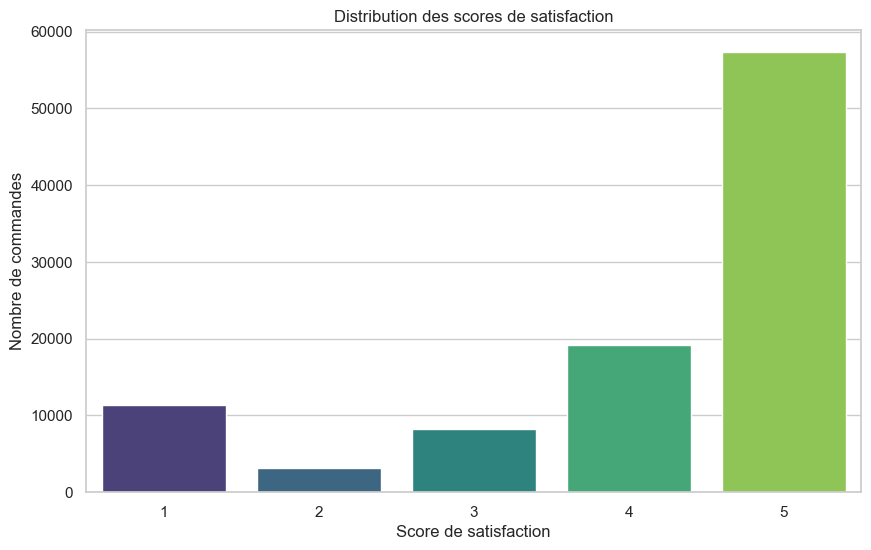

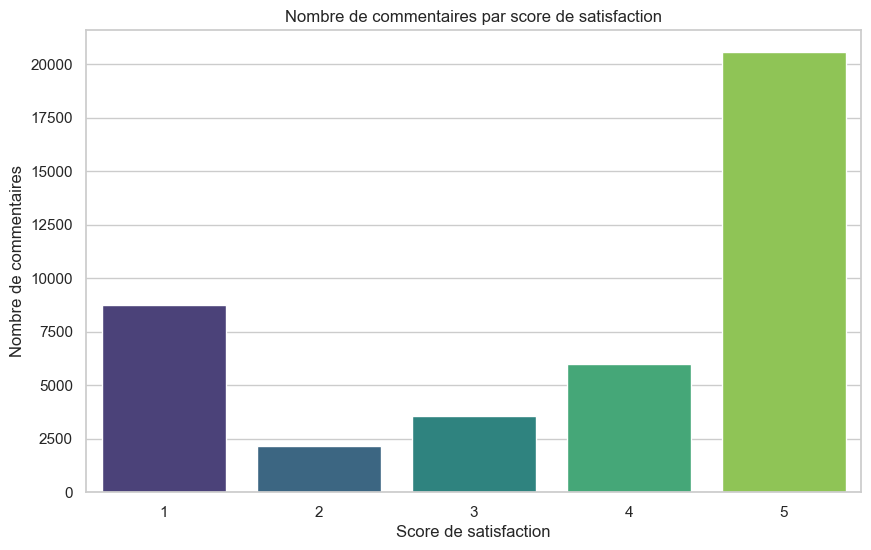

In [50]:
# Distribution des scores de satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=order_reviews, palette='viridis')
plt.title('Distribution des scores de satisfaction')
plt.xlabel('Score de satisfaction')
plt.ylabel('Nombre de commandes')
plt.show()

# Nombre de commentaires par score de satisfaction
order_reviews['has_comment'] = order_reviews['review_comment_message'].notnull()
comment_counts = order_reviews[order_reviews['has_comment']].groupby('review_score').size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='counts', data=comment_counts, palette='viridis')
plt.title('Nombre de commentaires par score de satisfaction')
plt.xlabel('Score de satisfaction')
plt.ylabel('Nombre de commentaires')
plt.show()

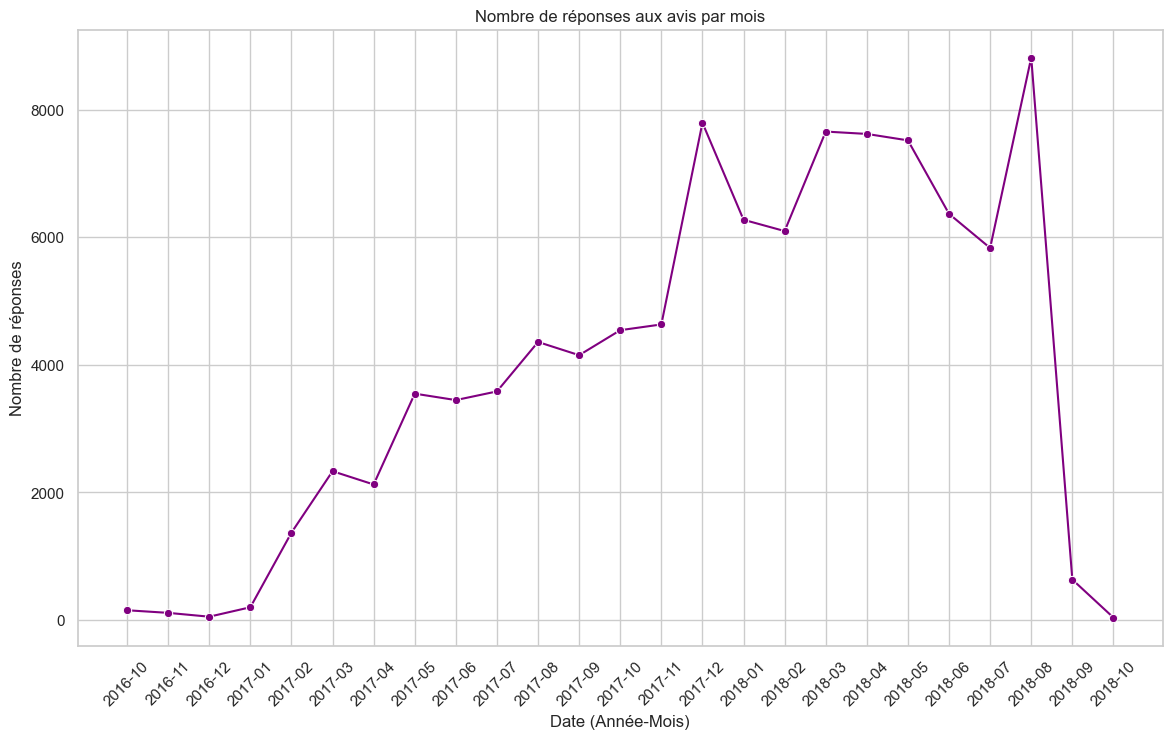

In [51]:
# Extraire l'année et le mois pour la visualisation
order_reviews['year_month'] = order_reviews['review_answer_timestamp'].dt.to_period('M')

# Compter le nombre de réponses par mois
monthly_responses = order_reviews['year_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_responses.index.astype(str), y=monthly_responses.values, marker='o', color='purple')
plt.title('Nombre de réponses aux avis par mois')
plt.xlabel('Date (Année-Mois)')
plt.ylabel('Nombre de réponses')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- **Graph 1 :** La majorité des clients ont donné des notes de 5 ou de 1, indiquant des expériences très bonnes ou très mauvaises.
- **Graph 2 :** Les commentaires sont principalement positifs (score 5), mais il y a aussi un nombre significatif de commentaires très négatifs (score 1).
- **Graph 3 :** Les réponses aux avis ont augmenté au fil du temps, suggérant une meilleure gestion des retours clients, avec une baisse notable en fin de période nécessitant une analyse plus approfondie.

In [52]:
# Suppression des colonnes inutiles pour notre étude
order_reviews = order_reviews.drop(columns=['review_comment_title', 'review_comment_message',
                                            'review_creation_date', 'review_answer_timestamp'])

# Affichage des premières lignes pour vérifier
order_reviews.head()

,review_id,order_id,review_score,has_comment,year_month
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,False,2018-01
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,False,2018-03
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,False,2018-02
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,True,2017-04
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,True,2018-03


**Bilan** :
***
- L'évaluation ne concerne que la commande mais pas le produit.
- Des valeurs manquantes sont présentes pour les variables 'review_comment_title' et 'review_comment_message' 
- Suppression des variables inutiles à notre étude.

### <a name="C8"><span style='background:PowderBlue'>***2.6 orders - Commandes***</span>

- ***La table orders contient des informations détaillées sur chaque commande passée par les clients.***

In [53]:
# Création du dataframe : 
orders = dataframes['orders'].copy()

In [54]:
# Taille : nombre de lignes/colonnes
nRow, nVar = orders.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 99441 lignes et 8 variables.


In [55]:
orders.shape

(99441, 8)

**Compréhension des variables**
***
- **order_id :** identifiant unique de la commande 
- **customer_id :**  Identifiant unique du client ayant passé la commande.  
- **order_status :** Statut de la commande (livrée, annulée, en cours, etc.).   
- **order_purchase_timestamp :** Date et heure de l'achat de la commande. 
- **order_approved_at :** Date et heure de l'approbation du paiement.
- **order_delivered_carrier_date :** Date de prise en charge par le transporteur.
- **order_delivered_customer_date :** Date de livraison au client. 
- **order_estimated_delivery_date :** Date de livraison estimée donnée au client lors de l'achat. 

In [56]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = orders.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = orders.notnull().sum() #count de values non nulls
    desc['unique'] = orders.nunique() # nombre de values unique
    desc['dtype'] = orders.dtypes # type de données dans chque colonne
    desc['count_null']=orders.isna().sum() #count de valeurs nulls
    desc['null%']=round((orders.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=orders.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [57]:
#Appel à la fonction
(decrire_dataframe(orders).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,order_id,99441,99441,object,0,0.000000,0
1,customer_id,99441,99441,object,0,0.000000,0
2,order_status,99441,8,object,0,0.000000,0
3,order_purchase_timestamp,99441,98875,object,0,0.000000,0
4,order_approved_at,99281,90733,object,160,0.160000,0
5,order_delivered_carrier_date,97658,81018,object,1783,1.790000,0
6,order_delivered_customer_date,96476,95664,object,2965,2.980000,0
7,order_estimated_delivery_date,99441,459,object,0,0.000000,0


In [58]:
#Vérifier l'unicité de la clé primaire
cle_primaire(orders,'order_id')

La variable order_id est une clé primaire


#### <font color='Blue'>***1. Distribution des statuts des commandes***

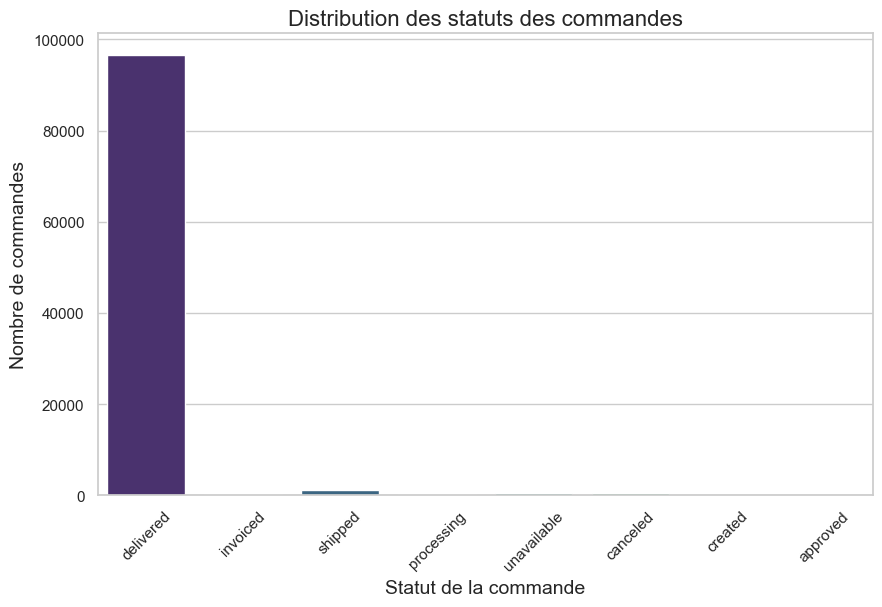

In [59]:
# Distribution des statuts des commandes
plt.figure(figsize=(10, 6))
sns.countplot(data=orders, x='order_status', palette='viridis')
plt.title("Distribution des statuts des commandes", fontsize=16)
plt.xlabel("Statut de la commande", fontsize=14)
plt.ylabel("Nombre de commandes", fontsize=14)
plt.xticks(rotation=45)
plt.show()

- ***La majorité des commandes ont été livrées.***

#### <font color='Blue'>***2. Nombre de commandes par mois***

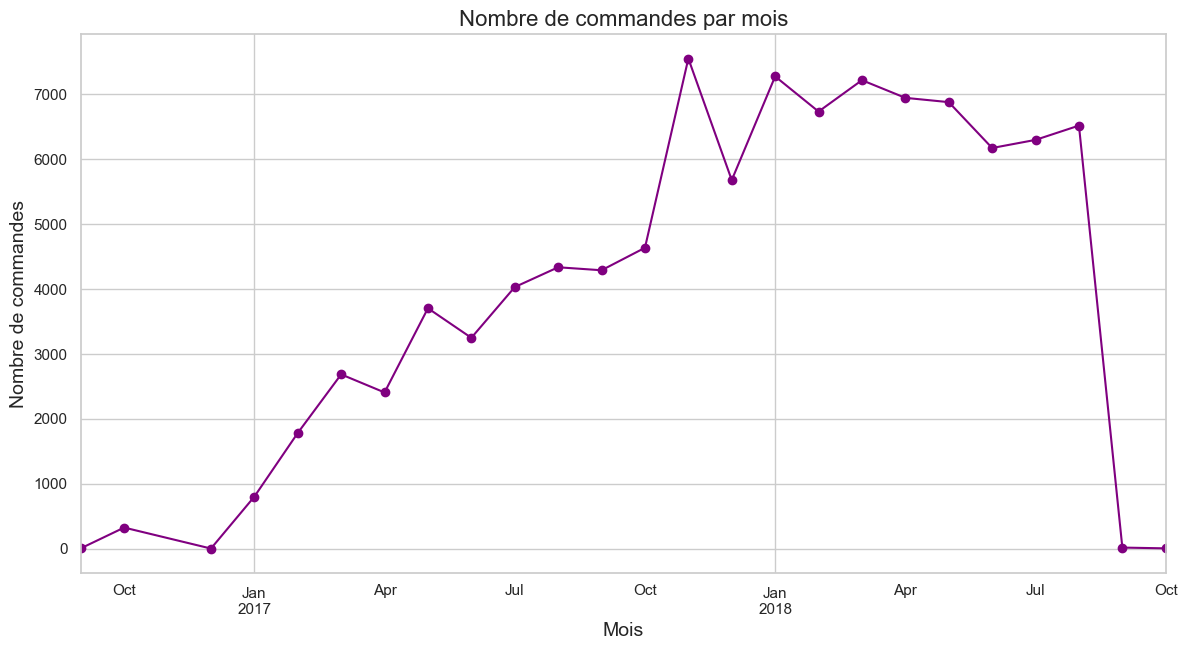

In [60]:
# Convertir order_purchase_timestamp en datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Ajouter une colonne 'month_year' pour l'analyse mensuelle
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Nombre de commandes par mois
monthly_orders = orders.groupby('month_year').size()

plt.figure(figsize=(14, 7))
monthly_orders.plot(kind='line', marker='o', color='purple')
plt.title("Nombre de commandes par mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Nombre de commandes", fontsize=14)
plt.grid(True)
plt.show()


- ***Le nombre de commandes a globalement augmenté jusqu'à 2018, avec une chute notable en fin de période.***

#### <font color='Blue'>***3. Temps moyen de traitement des commandes (de l'achat à la livraison)***

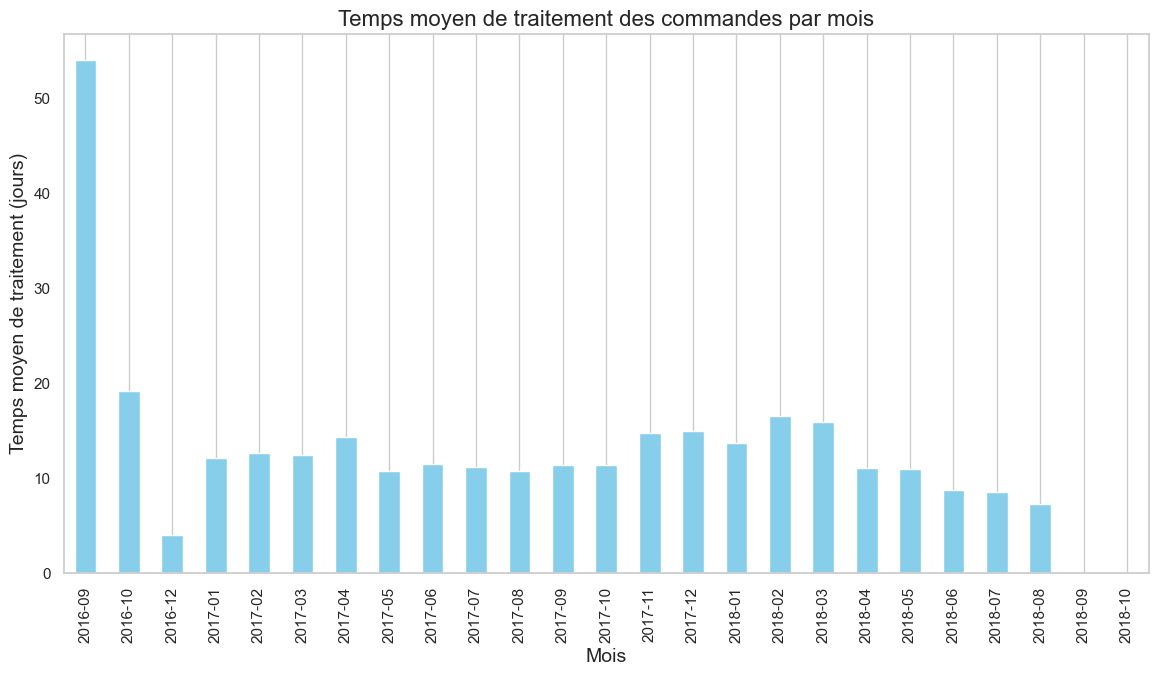

In [61]:
# Calcul du temps de traitement des commandes
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['processing_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Temps moyen de traitement des commandes par mois
monthly_processing_time = orders.groupby('month_year')['processing_time'].mean()

plt.figure(figsize=(14, 7))
monthly_processing_time.plot(kind='bar', color='skyblue')
plt.title("Temps moyen de traitement des commandes par mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Temps moyen de traitement (jours)", fontsize=14)
plt.grid(axis='y')
plt.show()

- ***Le temps de traitement des commandes a été irrégulier, avec des pics notables en septembre/octobre 2016 et décembre 2017.***

#### <font color='Blue'>***5. Délai de livraison par statut de commande***

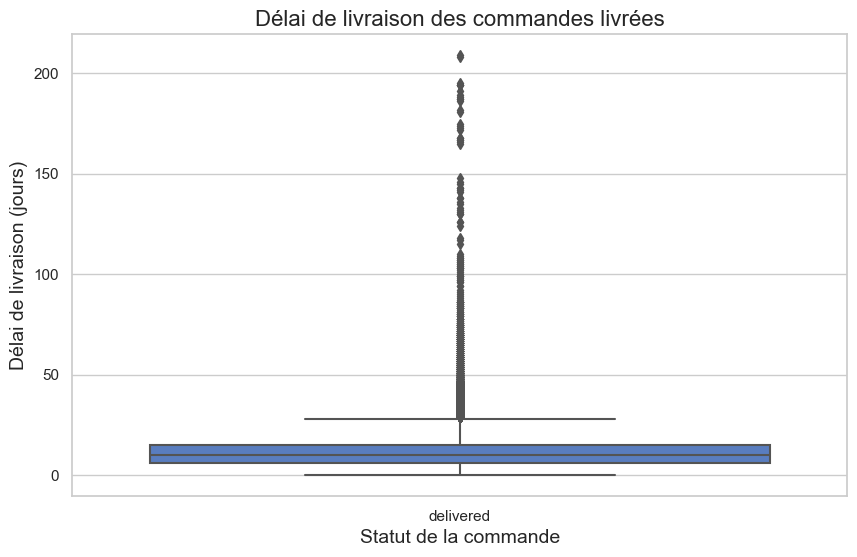

In [62]:
# Filtrer les données pour les commandes livrées
commandes_livrees = orders[orders['order_status'] == 'delivered'].copy()

# Calcul du délai de livraison
commandes_livrees['délai_de_livraison'] = (commandes_livrees['order_delivered_customer_date'] - commandes_livrees['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 6))
sns.boxplot(data=commandes_livrees, x='order_status', y='délai_de_livraison', palette='muted')
plt.title("Délai de livraison des commandes livrées", fontsize=16)
plt.xlabel("Statut de la commande", fontsize=14)
plt.ylabel("Délai de livraison (jours)", fontsize=14)
plt.show()

- ***Ce boxplot nous montre la distribution du délai de livraison (en jours) des commandes livrées.***
- ***La majorité des livraisons sont effectuées rapidement, mais il y a des exceptions avec des délais de livraison très longs ( les outliers).***

### <a name="C9"><span style='background:PowderBlue'>***2.7 translation - Traduction des noms de catégorie***</span>

- ***Traduit le nom de la catégorie du produit en anglais.***

In [63]:
# Création du dataframe : 
product_category_name_translation = dataframes['product_category_name_translation'].copy()

**Compréhension des variables**
***
- **product_category_name :**  nom de la catégorie en portugais  
- **product_category_name_english :**  nom de la catégorie en anglais   

In [64]:
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### <a name="C10"><span style='background:PowderBlue'>***2.8 products - produits***</span>

In [65]:
# Création du dataframe : 
products = dataframes['products'].copy()

In [66]:
# Taille : nombre de lignes/colonnes
nRow, nVar = products.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 32951 lignes et 9 variables.


In [67]:
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


**Compréhension des variables**
***
- **product_id :** identifiant unique du produit   
- **product_category_name :** Nom de la catégorie du produit en portugais 
- **product_name_lenght :** Longueur du nom du produit   
- **product_description_lenght :** Longueur de la description du produit 
- **product_photos_qty :** nombre de photos de produits publiées   
- **product_weight_g :** poids du produit mesuré en grammes  
- **product_length_cm :** longueur du produit mesurée en centimètres  
- **product_height_cm :** la hauteur du produit mesurée en centimètres  
- **product_width_cm :** largeur du produit mesurée en centimètres 

In [68]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = products.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = products.notnull().sum() #count de values non nulls
    desc['unique'] = products.nunique() # nombre de values unique
    desc['dtype'] = products.dtypes # type de données dans chque colonne
    desc['count_null']=products.isna().sum() #count de valeurs nulls
    desc['null%']=round((products.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=products.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

In [69]:
#Appel à la fonction
(decrire_dataframe(products).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,product_id,32951,32951,object,0,0.000000,0
1,product_category_name,32341,73,object,610,1.850000,0
2,product_name_lenght,32341,66,float64,610,1.850000,0
3,product_description_lenght,32341,2960,float64,610,1.850000,0
4,product_photos_qty,32341,19,float64,610,1.850000,0
5,product_weight_g,32949,2204,float64,2,0.010000,0
6,product_length_cm,32949,99,float64,2,0.010000,0
7,product_height_cm,32949,102,float64,2,0.010000,0
8,product_width_cm,32949,95,float64,2,0.010000,0


In [70]:
# Traduction des noms de catégories des produits de portugais à anglais
# Fusion avec le jeu de données translation mais 71 catégories
# et 73 catégories dans products ==> 2 catégories à traduire
products = products.merge(
    product_category_name_translation, on='product_category_name', how="left")

In [71]:
# Identifier les catégories de produits qui n'ont pas encore été traduites en anglais
products[products['product_category_name_english']
            .isna() & products['product_category_name']
            .notnull()][['product_category_name',
                         'product_category_name_english']]

,product_category_name,product_category_name_english
1628,pc_gamer,NaN
5821,portateis_cozinha_e_preparadores_de_alimentos,NaN
7325,portateis_cozinha_e_preparadores_de_alimentos,NaN
7478,pc_gamer,NaN
8819,portateis_cozinha_e_preparadores_de_alimentos,NaN
11039,portateis_cozinha_e_preparadores_de_alimentos,NaN
14266,portateis_cozinha_e_preparadores_de_alimentos,NaN
16182,portateis_cozinha_e_preparadores_de_alimentos,NaN
16930,pc_gamer,NaN
17800,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [72]:
# traduction portugais / anglais
products.loc[(products['product_category_name'] == 'pc_gamer'),
                'product_category_name_english'] = 'pc_gamer'
products.loc[(products['product_category_name'] ==
                 'portateis_cozinha_e_preparadores_de_alimentos'),
                'product_category_name_english'] = \
                'kitchen_laptops_and_food_preparers'

#### <font color='Blue'>***1. Distribution des catégories de produits***

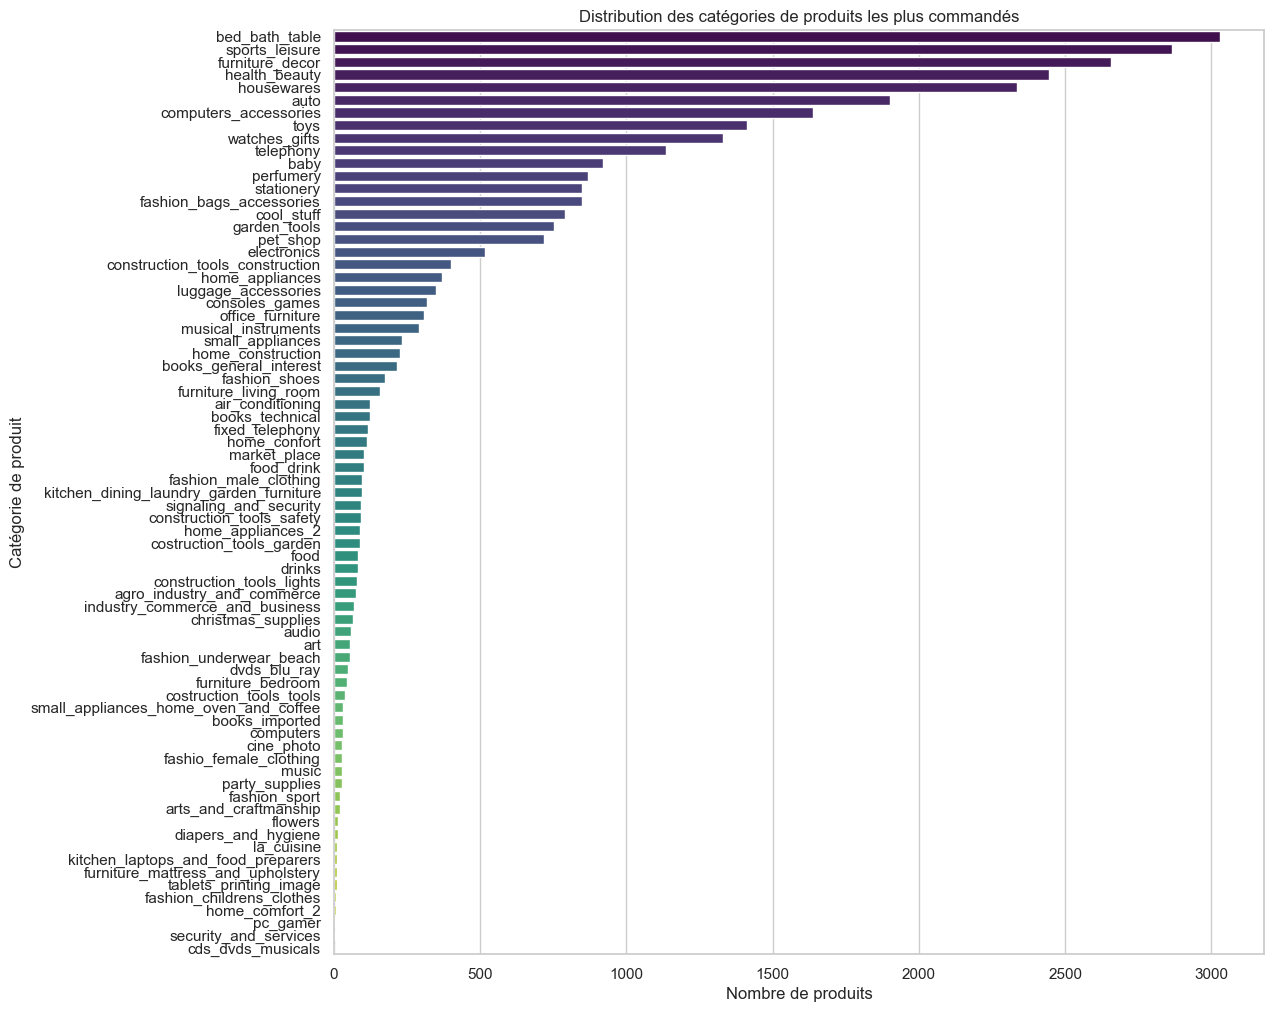

In [73]:
# Distribution des catégories de produits en anglais
plt.figure(figsize=(12, 12))
sns.countplot(y=products['product_category_name_english'], 
              order=products['product_category_name_english'].value_counts().index, 
              palette='viridis')
plt.title('Distribution des catégories de produits les plus commandés')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de produit')
plt.show()

#### <font color='Blue'>***2. Top 10 des catégories les plus commandées***

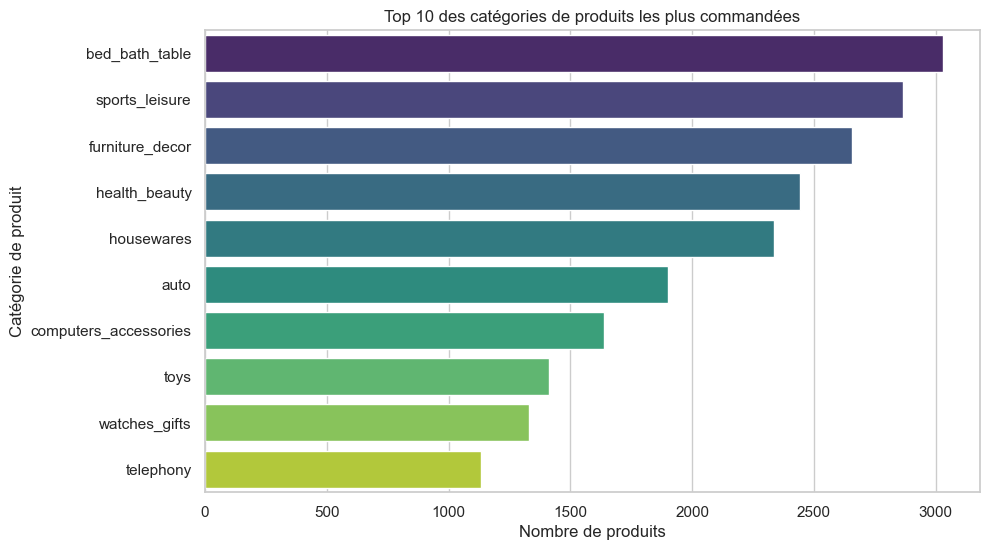

In [74]:
# Compter le nombre de produits par catégorie en anglais
top_categories = products['product_category_name_english'].value_counts().head(10)

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 des catégories de produits les plus commandées')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de produit')
plt.show()

In [75]:
# Suppression des variables inutiles pour notre étude (catégorie en portugais,
# les tailles des descriptions, la taille du produit)
products = products.drop(['product_name_lenght',
                                'product_description_lenght',
                                'product_photos_qty',
                                'product_weight_g', 'product_length_cm',
                                'product_height_cm', 'product_width_cm'],
                               axis=1)

### <a name="C11"><span style='background:PowderBlue'>***2.9 sellers - Vendeurs***</span>

In [76]:
# Création du dataframe : 
sellers = dataframes['sellers'].copy()

In [77]:
# Taille : nombre de lignes/colonnes
nRow, nVar = sellers.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 3095 lignes et 4 variables.


In [78]:
sellers.shape

(3095, 4)

In [79]:
def decrire_dataframe(df: pd.DataFrame):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    desc = sellers.columns.to_frame(name="column").set_index('column') #construire le dataframe résultats
    desc['count'] = sellers.notnull().sum() #count de values non nulls
    desc['unique'] = sellers.nunique() # nombre de values unique
    desc['dtype'] = sellers.dtypes # type de données dans chque colonne
    desc['count_null']=sellers.isna().sum() #count de valeurs nulls
    desc['null%']=round((sellers.isna().sum()/df.shape[0]*100),2)
    desc['duplicated']=sellers.duplicated(keep=False).sum() # nombre de valeurs en doubles
    return desc

#Vérifier l'unicité de la clé primaire
#Creation d'une fonction qui teste l'unicité d'une colonne  

def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable',col, 'n\'est pas une clé primaire')

def is_zero(cell_value, color='pink'):
    """
    style pour souligné une valeur
    example use:
    df.style.applymap(is_zero,subset=["my_col"],color='red')
    """
    return f'background-color: {color};' if cell_value == 0 else None

**Compréhension des variables**
***
- **seller_id :** identifiant unique du vendeur 
- **seller_zip_code_prefix :** Préfixe du code postal du vendeur   
- **seller_city :** ville du vendeur  
- **seller_state :** État du vendeur   

In [80]:
#Appel à la fonction
(decrire_dataframe(sellers).reset_index().style
    .bar(axis='index', subset=['count'], color='green')
    .applymap(is_zero, subset=['count', 'unique'], color='pink'))

,column,count,unique,dtype,count_null,null%,duplicated
0,seller_id,3095,3095,object,0,0.000000,0
1,seller_zip_code_prefix,3095,2246,int64,0,0.000000,0
2,seller_city,3095,611,object,0,0.000000,0
3,seller_state,3095,23,object,0,0.000000,0


#### <font color='Blue'>***1.Répartition des vendeurs par ville***

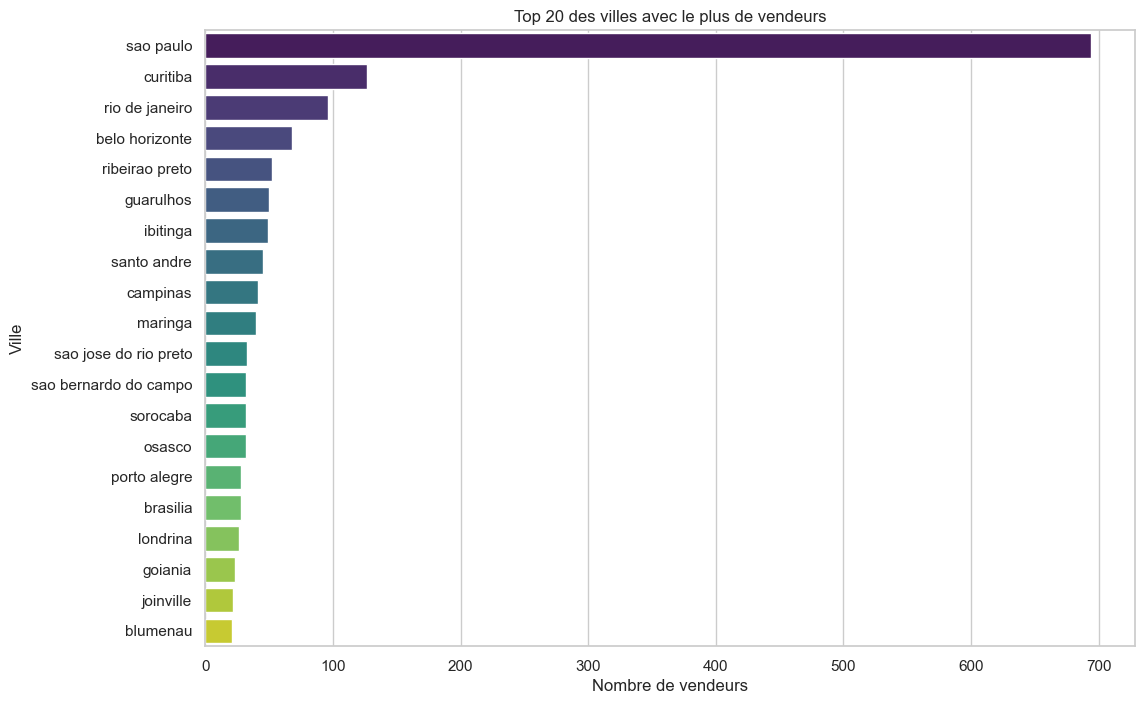

In [81]:
# Compter les vendeurs par ville (top 20 villes)
vendeurs_par_ville = sellers['seller_city'].value_counts().head(20)

# Bar plot de la répartition des vendeurs par ville
plt.figure(figsize=(12, 8))
sns.barplot(x=vendeurs_par_ville.values, y=vendeurs_par_ville.index, palette='viridis')
plt.title('Top 20 des villes avec le plus de vendeurs')
plt.xlabel('Nombre de vendeurs')
plt.ylabel('Ville')
plt.show()

<font color='Blue'>***L'étude porte sur la segmentation de clientèle, ce jeu de données ne sera pas fuionné pour constituer le dataframe de travail.***

### <a name="C12"><span style='background:PowderBlue'>***2.10 Bilan des jeux de données***<span>

#### <font color='Blue'>**Informations principales**
- Historique des commandes
- Articles commandés et prix
- Catégories de produits
- Commentaires de satisfaction
- Localisation des clients et vendeurs
- Délais de livraison
****
#### <font color='Blue'>**Valeurs manquantes**
- Présentes dans :
- df_orders (commandes)
- df_products (produits)
****
- **Format des dates**
- Toutes les dates ont été converties en datetime pour faciliter l'analyse.
****
#### <font color='Blue'>**Vendeurs**
- Les données sur les vendeurs ne sont pas utiles pour la segmentation de la clientèle et ne seront pas utilisées.
****
#### <font color='Blue'>**Segmentation des clients**
- La segmentation vise à diviser les clients en groupes similaires pour améliorer la stratégie marketing d'Olist.

    - Mieux comprendre les attentes des clients
    - Cibler plus précisément les communications et offres
    - Optimiser les ressources de l'entreprise
    
- **Types de segmentation :**

- Démographique : Pas de données disponibles (Âge, genre, catégorie socio-professionnelle, etc.)
- Géographique : Données de localisation disponibles
- Psychographique : Données d'évaluation disponibles, mais les commentaires sont peu renseignés
- Comportementale : Données d'achat et catégories de produits disponible (Fréquence d'achat, marques préférées, loyauté, etc.)
****
#### <font color='Blue'>**Stratégie**
- ***Les clients seront regroupés en clusters uniques. Pour ce faire, nous assemblerons les jeux de données en un seul DataFrame, puis agréger les données pour chaque client unique (customer_unique_id) en une seule ligne, en utilisant des opérations appropriées (somme, moyenne, etc.).***

# <a name="C13"><font color='RoyalBlue'> 3. Assemblage des jeux de données</a>

In [82]:
data = pd.merge(orders, order_items, on="order_id")

In [83]:
data = pd.merge(data, customers, on="customer_id")

In [84]:
data = pd.merge(data, products, on="product_id")

In [85]:
data = pd.merge(data, order_payments, on="order_id")

In [86]:
data = pd.merge(data, order_reviews, on="order_id")

In [87]:
data = pd.merge(data, product_category_name_translation, on="product_category_name")

In [88]:
# Aggregation of geolocation data, because for one postal code, there are several location data
geo_aggregated = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
}).reset_index()

In [89]:
geo_aggregated

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,01001,-23.550190,-46.634024
1,01002,-23.548146,-46.634979
2,01003,-23.548994,-46.635731
3,01004,-23.549799,-46.634757
4,01005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [90]:
data = pd.merge(data, geo_aggregated, 
                       left_on='customer_zip_code_prefix', 
                       right_on='geolocation_zip_code_prefix', 
                       how='left')

In [91]:
data.shape

(115609, 35)

# <a name="C14"><font color='RoyalBlue'> 4. Finalisation de jeux de données</a>

In [92]:
# Dataframe de travail
data = data.copy()

In [93]:
features_list = data.columns.tolist()
for feature in features_list:
    print(feature)

order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
month_year
processing_time
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
annee_mois
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
product_category_name
product_category_name_english_x
payment_sequential
payment_type
payment_installments
payment_value
review_id
review_score
has_comment
year_month
product_category_name_english_y
geolocation_zip_code_prefix
geolocation_lat
geolocation_lng


#### <font color='Blue'>***Suppression des variables de jointure devenues inutiles***

In [94]:
# Suppression variables de jointure inutiles
data = data.drop(['product_category_name','geolocation_zip_code_prefix', 'review_id',
                  'seller_id','customer_id'], axis=1)
data.shape

(115609, 30)

#### <font color='Blue'>***Suppression variables de jointure inutiles***

In [95]:
#Suppression des doublons
data = data.drop_duplicates()
data.shape

(115285, 30)

#### <font color='Blue'>***Traitement des valeurs manquantes***

In [96]:
# Fonction pour afficher les valeurs manquantes
def afficher_valeurs_manquantes(data, nom_data):
    total = data.isnull().sum()
    pourcentage = (total / len(data)) * 100
    missing_data = pd.DataFrame({'total': total, 'pourcentage': pourcentage})
    print(f"Valeurs manquantes dans {nom_data} :")
    print(missing_data[missing_data['total'] > 0])
    print('\n')

# Analyser les valeurs manquantes pour chaque DataFrame
afficher_valeurs_manquantes(order_reviews, 'order_reviews')
afficher_valeurs_manquantes(orders, 'orders')
afficher_valeurs_manquantes(products, 'products')

Valeurs manquantes dans order_reviews :
Empty DataFrame
Columns: [total, pourcentage]
Index: []


Valeurs manquantes dans orders :
                               total  pourcentage
order_approved_at                160     0.160899
order_delivered_carrier_date    1783     1.793023
order_delivered_customer_date   2965     2.981668
processing_time                 2965     2.981668


Valeurs manquantes dans products :
                               total  pourcentage
product_category_name            610     1.851234
product_category_name_english    610     1.851234




- ***Pour orders: étant donné la faible proportion de valeurs manquantes,on a décidé de les supprimer.***

In [97]:
data = data.dropna()
data.shape

(112578, 30)

#### <font color='Blue'>***Traitement des valeurs aberrantes***
*****
#### <font color='Blue'>Traiter les valeurs aberrantes liées aux dates est une méthode courante dans le traitement des données de commerce électronique.
- ***Vérification des anomalies de dates :*** Vérifier les dates antérieures (comme la date de commande) ne soient pas postérieures à des dates qui devraient être ultérieures (comme la date de traitement par le transporteur ou la date de paiement). 

- ***Correction des données :*** Si des anomalies sont détectées, comme une date de commande postérieure à la date de prise en charge par le transporteur, ces données sont soit corrigées, soit exclues de l'analyse selon la nature et l'importance de l'erreur.

In [98]:
# Conversion des colonnes de date en datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

# Vérification que la date de commande est antérieure à la date de traitement logistique
data = data[data['order_purchase_timestamp'] <= data['order_delivered_carrier_date']]

# Vérification que la date de commande est antérieure à la date de paiement
data = data[data['order_purchase_timestamp'] <= data['order_approved_at']]

# Vérification que la date de commande est antérieure à la date de livraison
data = data[data['order_purchase_timestamp'] <= data['order_delivered_customer_date']]

# Afficher la forme du DataFrame après traitement
data.shape

(112393, 30)

# <a name="C15"><font color='RoyalBlue'>5. Analyse Exploratoire des données</a>

### <a name="C16"><span style='background:PowderBlue'>5.1 Analyse univariée</span>

#### <font color='indianred'>5.1.1 Variables_quantitatives</a>

In [99]:
data.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,processing_time,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,geolocation_lat,geolocation_lng
count,112393,112393,112393,112393,112393.000000,112393.000000,112393,112393.000000,112393.000000,112393.00000,112393.000000,112393.000000,112393.000000,112393.000000,112393.000000
mean,2018-01-01 05:05:43.365912576,2018-01-01 15:32:28.485751040,2018-01-04 11:49:28.648679168,2018-01-13 15:42:45.114259712,11.976849,1.194932,2018-01-07 19:38:43.985639680,119.953808,19.998753,1.09126,2.940583,171.638271,4.081411,-21.245422,-46.204282
min,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,0.000000,1.000000,2016-10-08 10:34:01,0.850000,0.000000,1.00000,0.000000,0.000000,1.000000,-33.689948,-72.668881
25%,2017-09-13 13:50:04,2017-09-13 22:03:51,2017-09-15 20:04:55,2017-09-25 18:23:32,6.000000,1.000000,2017-09-20 12:50:15,39.900000,13.080000,1.00000,1.000000,60.850000,4.000000,-23.591583,-48.108118
50%,2018-01-19 21:00:08,2018-01-20 11:19:34,2018-01-23 23:24:19,2018-02-01 23:31:37,10.000000,1.000000,2018-01-26 13:59:10,74.900000,16.320000,1.00000,2.000000,108.000000,5.000000,-22.928999,-46.632826
75%,2018-05-05 08:37:48,2018-05-05 14:53:27,2018-05-08 13:39:00,2018-05-15 18:39:28,15.000000,1.000000,2018-05-10 17:10:24,133.000000,21.190000,1.00000,4.000000,189.090000,5.000000,-20.199186,-43.648902
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,208.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,26.00000,24.000000,13664.080000,5.000000,42.184003,-8.723762
std,NaN,NaN,NaN,NaN,9.365442,0.686227,NaN,181.431197,15.725189,0.68882,2.776959,264.720903,1.346267,5.553311,4.039586


- **Effectuons l'analyse univariée des variables numériques**

Statistiques pour 'processing_time':
Moyenne: 11.98
Médiane: 10.00
Écart Type: 9.37
Variance: 87.71
Minimum: 0.00
Maximum: 208.00
Quartile 25%: 6.00
Quartile 75%: 15.00
Skewness empirique: 3.80
Kurtosis empirique: 39.42


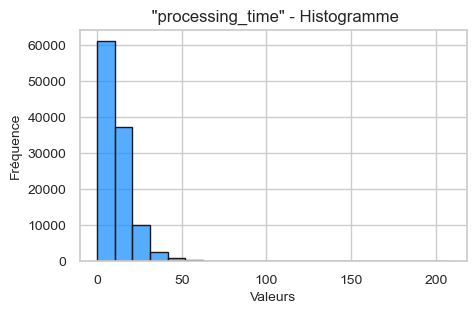

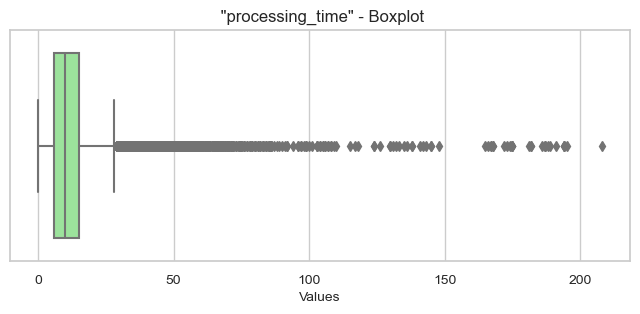

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'order_item_id':
Moyenne: 1.19
Médiane: 1.00
Écart Type: 0.69
Variance: 0.47
Minimum: 1.00
Maximum: 21.00
Quartile 25%: 1.00
Quartile 75%: 1.00
Skewness empirique: 7.23
Kurtosis empirique: 94.67


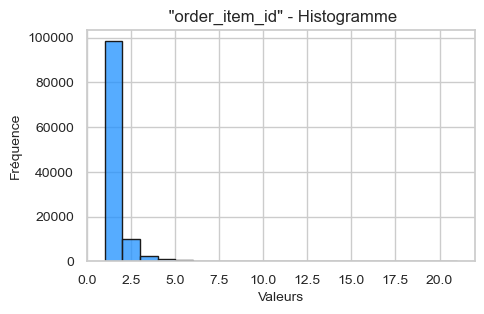

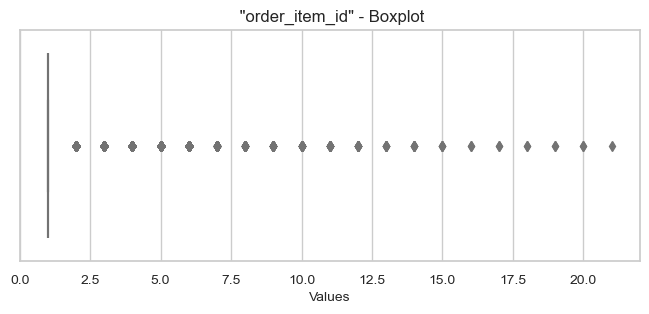

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'price':
Moyenne: 119.95
Médiane: 74.90
Écart Type: 181.43
Variance: 32917.28
Minimum: 0.85
Maximum: 6735.00
Quartile 25%: 39.90
Quartile 75%: 133.00
Skewness empirique: 7.71
Kurtosis empirique: 111.49


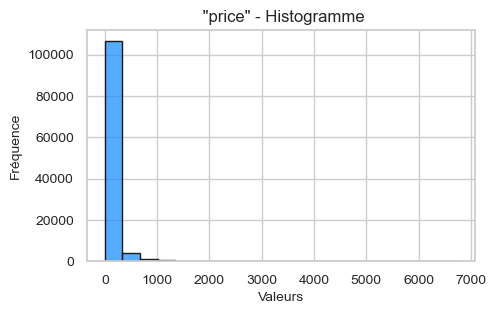

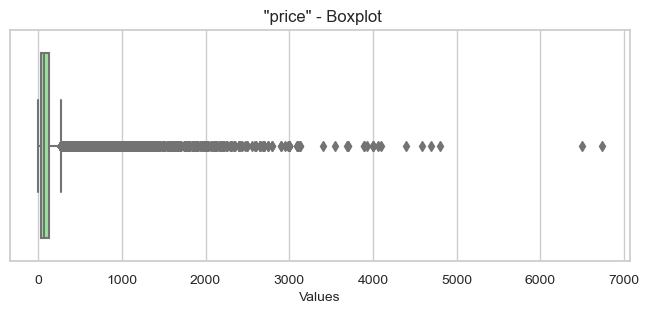

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'freight_value':
Moyenne: 20.00
Médiane: 16.32
Écart Type: 15.73
Variance: 247.28
Minimum: 0.00
Maximum: 409.68
Quartile 25%: 13.08
Quartile 75%: 21.19
Skewness empirique: 5.60
Kurtosis empirique: 59.42


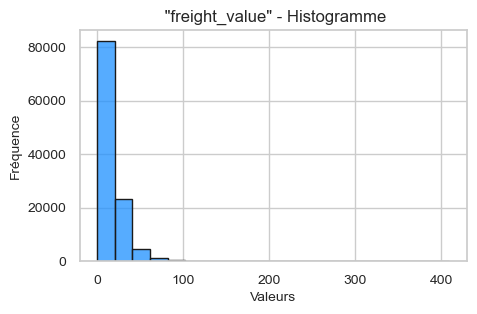

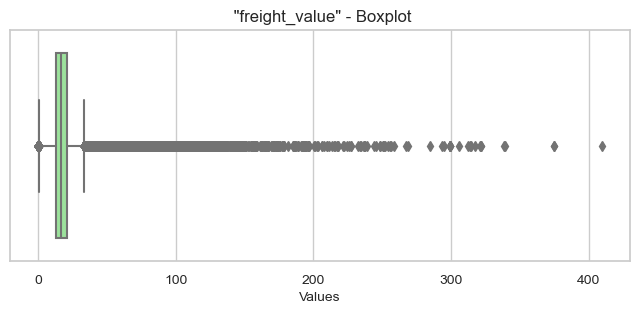

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'payment_sequential':
Moyenne: 1.09
Médiane: 1.00
Écart Type: 0.69
Variance: 0.47
Minimum: 1.00
Maximum: 26.00
Quartile 25%: 1.00
Quartile 75%: 1.00
Skewness empirique: 15.07
Kurtosis empirique: 308.46


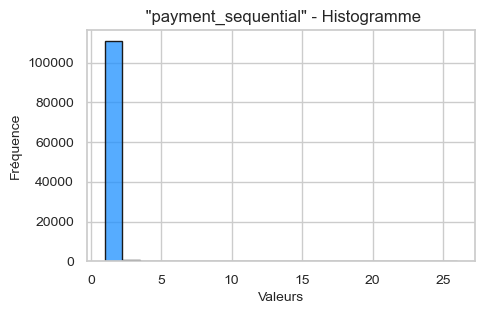

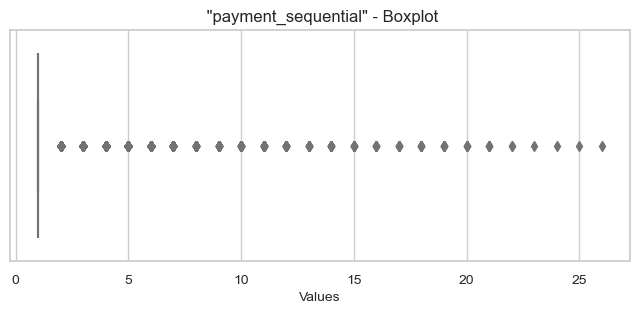

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'payment_installments':
Moyenne: 2.94
Médiane: 2.00
Écart Type: 2.78
Variance: 7.71
Minimum: 0.00
Maximum: 24.00
Quartile 25%: 1.00
Quartile 75%: 4.00
Skewness empirique: 1.62
Kurtosis empirique: 2.53


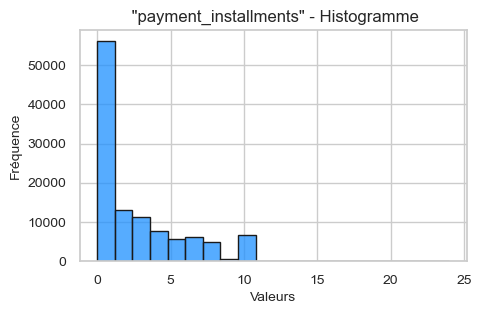

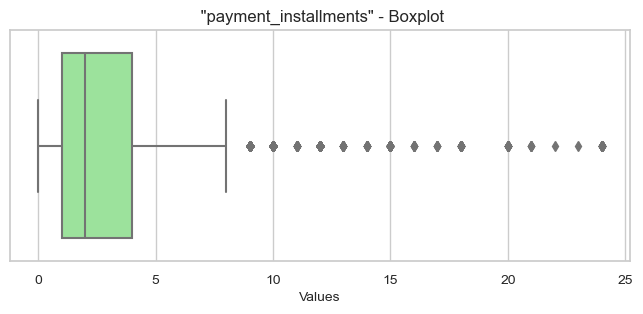

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'payment_value':
Moyenne: 171.64
Médiane: 108.00
Écart Type: 264.72
Variance: 70077.16
Minimum: 0.00
Maximum: 13664.08
Quartile 25%: 60.85
Quartile 75%: 189.09
Skewness empirique: 14.66
Kurtosis empirique: 547.01


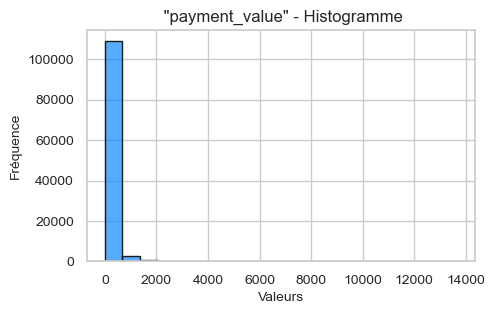

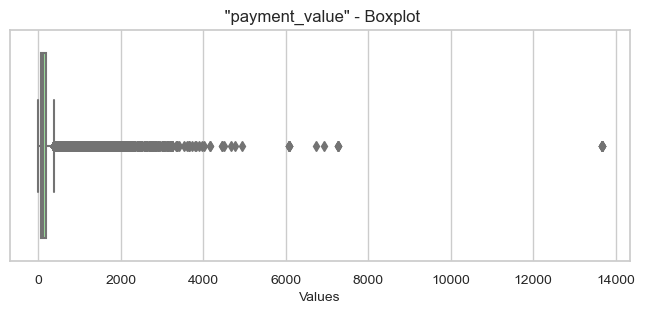

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'review_score':
Moyenne: 4.08
Médiane: 5.00
Écart Type: 1.35
Variance: 1.81
Minimum: 1.00
Maximum: 5.00
Quartile 25%: 4.00
Quartile 75%: 5.00
Skewness empirique: -1.35
Kurtosis empirique: 0.48


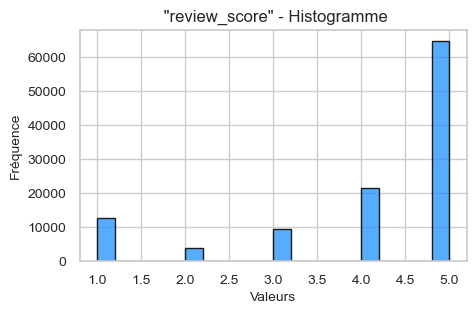

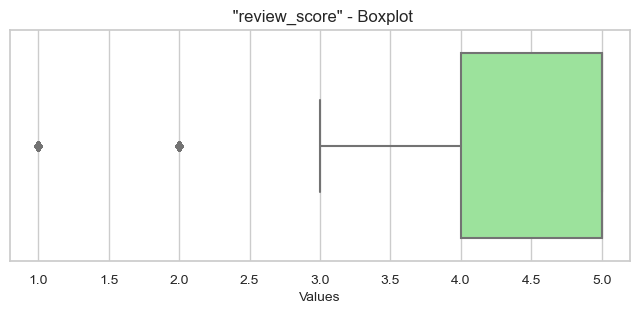

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'geolocation_lat':
Moyenne: -21.25
Médiane: -22.93
Écart Type: 5.55
Variance: 30.84
Minimum: -33.69
Maximum: 42.18
Quartile 25%: -23.59
Quartile 75%: -20.20
Skewness empirique: 1.64
Kurtosis empirique: 3.14


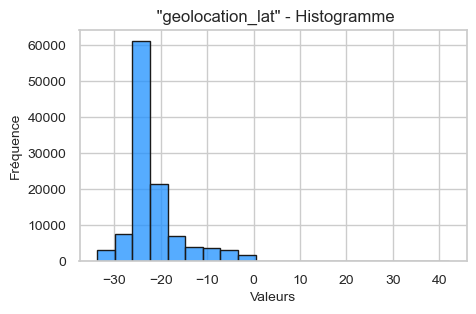

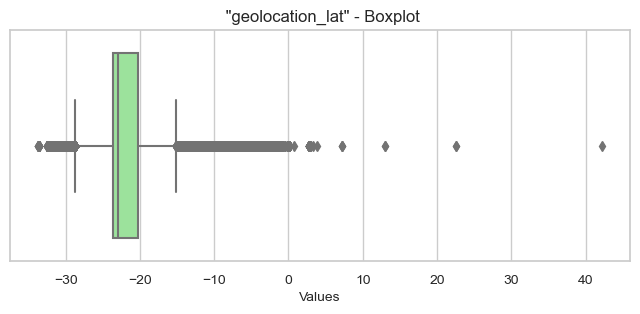

-------------------------------------------------------------------------------------------
 
 
Statistiques pour 'geolocation_lng':
Moyenne: -46.20
Médiane: -46.63
Écart Type: 4.04
Variance: 16.32
Minimum: -72.67
Maximum: -8.72
Quartile 25%: -48.11
Quartile 75%: -43.65
Skewness empirique: 0.01
Kurtosis empirique: 2.07


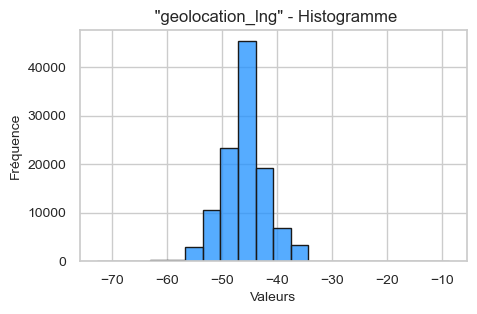

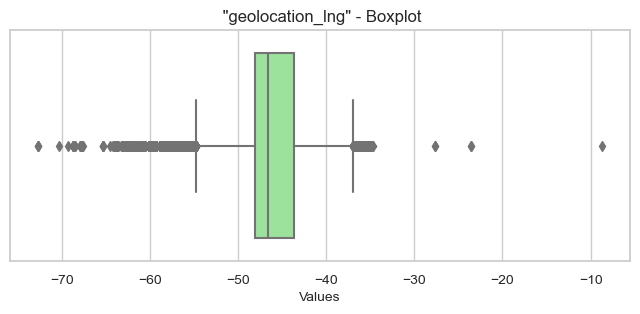

-------------------------------------------------------------------------------------------
 
 


In [100]:
# Sélectionnons uniquement les colonnes numériques
numeric_columns =data.select_dtypes(include=[np.number])

# Itérons sur les colonnes numériques
for colonne in numeric_columns.columns:
    # Calcul des statistiques
    moyenne = numeric_columns[colonne].mean()
    mediane = numeric_columns[colonne].median()
    ecart_type = numeric_columns[colonne].std()
    variance = numeric_columns[colonne].var()
    minimum = numeric_columns[colonne].min()
    maximum = numeric_columns[colonne].max()
    quantile_25 = numeric_columns[colonne].quantile(0.25)
    quantile_75 = numeric_columns[colonne].quantile(0.75)
    skewness = numeric_columns[colonne].skew()
    kurt = numeric_columns[colonne].kurtosis()
    

    # Affichage des statistiques
    print(f"Statistiques pour '{colonne}':")
    print(f"Moyenne: {moyenne:.2f}")
    print(f"Médiane: {mediane:.2f}")
    print(f"Écart Type: {ecart_type:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Minimum: {minimum:.2f}")
    print(f"Maximum: {maximum:.2f}")
    print(f"Quartile 25%: {quantile_25:.2f}")
    print(f"Quartile 75%: {quantile_75:.2f}")
    print(f"Skewness empirique: {skewness:.2f}")
    print(f"Kurtosis empirique: {kurt:.2f}")   

    # Création de l'histogramme
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=colonne, bins=20, kde=False, color='DodgerBlue', edgecolor='k')
    plt.title(f' "{colonne}" - Histogramme', fontsize=12)
    plt.xlabel('Valeurs', fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
    plt.tick_params(axis='both', labelsize=10)
    plt.show()
    
    # Creation des box plot
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=data, x=colonne, color='lightgreen', orient='h')
    plt.title(f' "{colonne}" - Boxplot', fontsize=12)
    plt.xlabel('Values', fontsize=10)
    plt.tick_params(axis='both', labelsize=10)
    plt.show()
    
    

    print("-------------------------------------------------------------------------------------------")
    print(' ')
    print(' ')

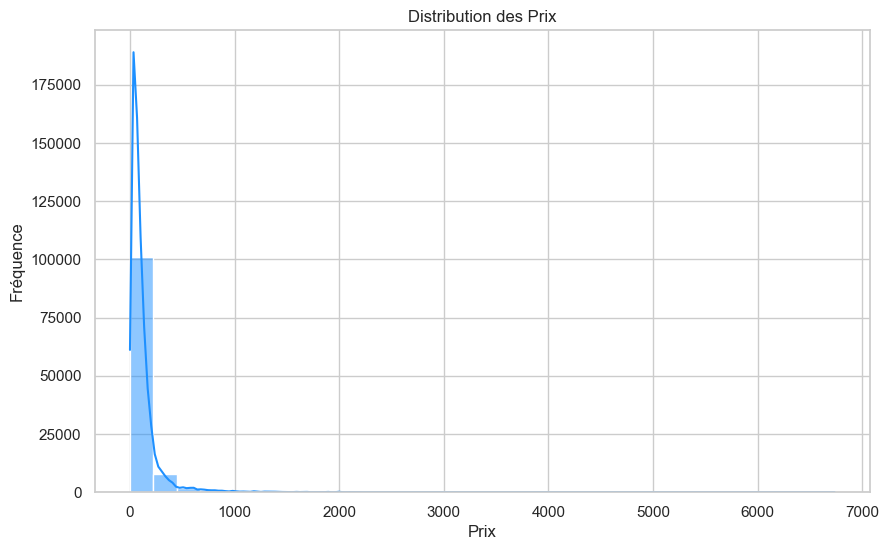

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='price', bins=30, kde=True, color='DodgerBlue')
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

***L'analyse univariée permetde mieux comprendre les tendances et les comportements dans les transactions e-commerce.***

- **Temps de traitement ("processing_time") :**

Le temps de traitement montre que la majorité des commandes ont été traitées rapidement, avec une médiane et des quartiles inférieurs assez bas, suggérant une efficacité opérationnelle. Les valeurs extrêmes indiquent cependant quelques retards significatifs.

- **Latitude géographique ("geolocation_lat") :**

Les données de latitude se concentrent fortement autour de la valeur médiane, indiquant une répartition géographique centrée, avec quelques valeurs extrêmes qui pourraient représenter des erreurs de saisie ou des adresses très éloignées.**

-  **Longitude géographique ("geolocation_lng") :**

Comme pour la latitude, la concentration autour de la médiane est évidente, avec des valeurs extrêmes moins prononcées, reflétant une distribution standard pour une grande région comme le Brésil.

- **Score de satisfaction ("review_score") :**

Les scores de satisfaction montrent une prédominance de notes élevées (5 étoiles), ce qui est un indicateur positif de la satisfaction client. Les valeurs basses existent mais sont nettement moins fréquentes.

- **Nombre d'articles par commande ("order_item_id") :**

La plupart des commandes contiennent un seul article, ce qui est typique pour des commandes en ligne. Les commandes contenant plus d'articles sont beaucoup moins fréquentes.

- **Prix des produits ("price") :**

La distribution des prix montre que la majorité des produits coûtent moins de 200 unités monétaires, avec des pics significatifs à bas prix. Les valeurs extrêmes suggèrent des produits de luxe ou de grande valeur.

- **Coût de livraison ("freight_value") :**

La distribution des frais de port montre que la plupart des coûts sont relativement bas, ce qui pourrait être attractif pour les consommateurs. Les extrêmes indiquent des livraisons spéciales ou urgentes.

- **Nombre de versements de paiement ("payment_installments") :**

Les données montrent que la plupart des achats sont effectués en peu de versements, avec une préférence pour le paiement immédiat ou à court terme.

- **Valeur totale des paiements ("payment_value") :**

Les valeurs de paiement varient considérablement, indiquant une large gamme de prix et de types d'achats, des plus courants aux achats de grande valeur.

 <font color='indianred'> ***La variable temporelle***

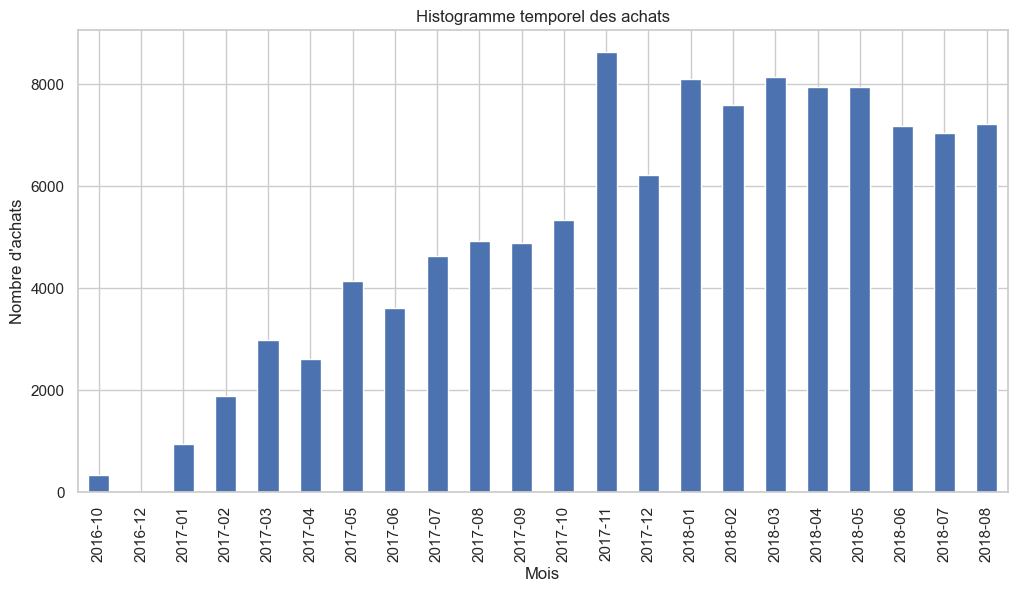

In [102]:
# Créer un histogramme temporel des achats
plt.figure(figsize=(12, 6))
data['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title("Histogramme temporel des achats")
plt.xlabel("Mois")
plt.ylabel("Nombre d'achats")
plt.show()

- ***Le graphique montre une augmentation progressive du nombre d'achats mensuels de 2016 à 2018, avec un pic notable en novembre 2017***

#### <a name="C31"><font color='indianred'>5.1.2 Variables_qualitatives</a>

In [103]:
# les deux colonnes contiennent les mêmes données, je supprime une et je renomme l'autre
data.drop(columns=['product_category_name_english_y'], inplace=True)
data.rename(columns={'product_category_name_english_x': 'product_category_name_english'}, inplace=True)

Nombre_categorie = data['product_category_name_english'].value_counts()
print(len(Nombre_categorie))

71


In [104]:
category_counts = data['product_category_name_english'].value_counts()

# Trier les catégories par ordre décroissant
top_categorie = category_counts.sort_values(ascending=False)

# Afficher les 10 premières catégories
print(top_categorie.head(10))

product_category_name_english
bed_bath_table           11559
health_beauty             9669
sports_leisure            8663
furniture_decor           8495
computers_accessories     7868
housewares                7117
watches_gifts             5993
telephony                 4553
garden_tools              4428
auto                      4219
Name: count, dtype: int64


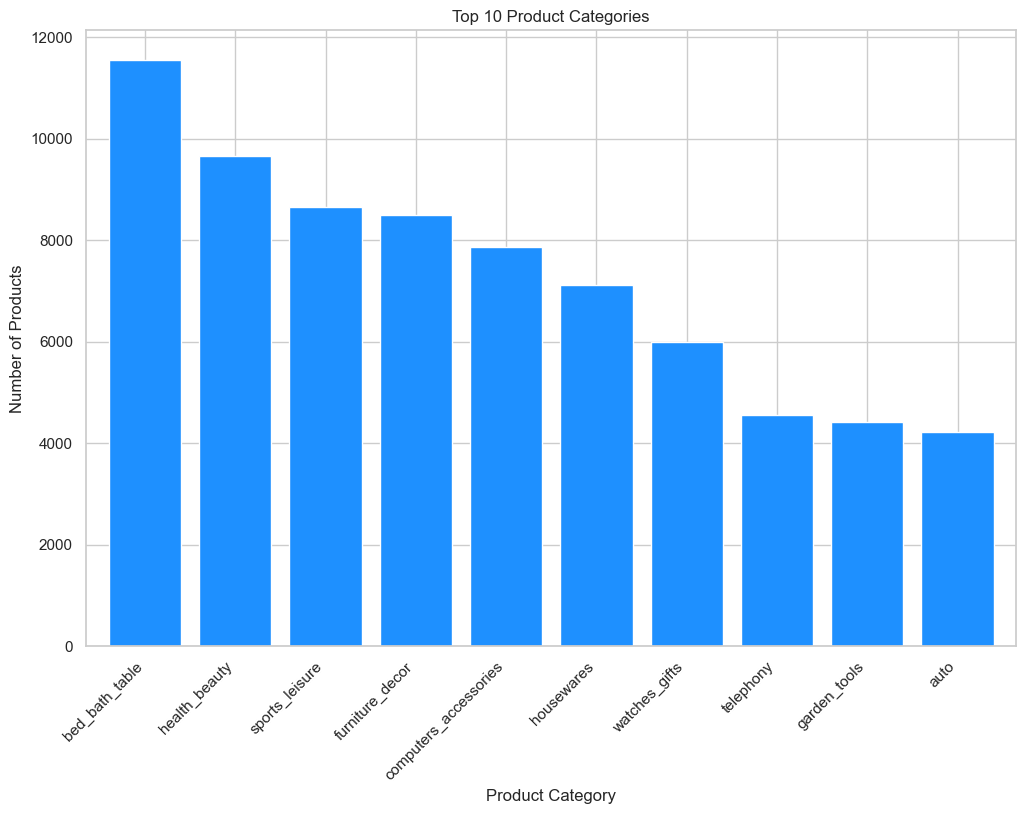

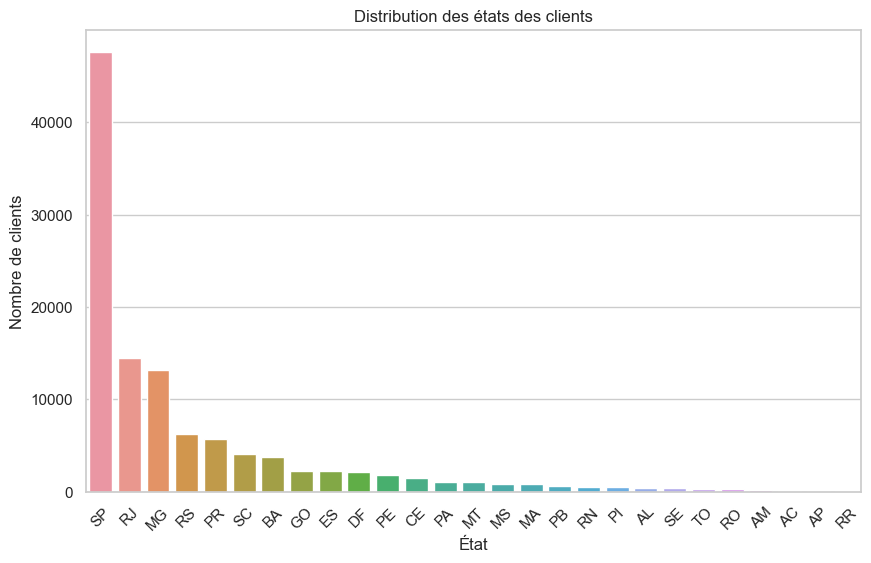

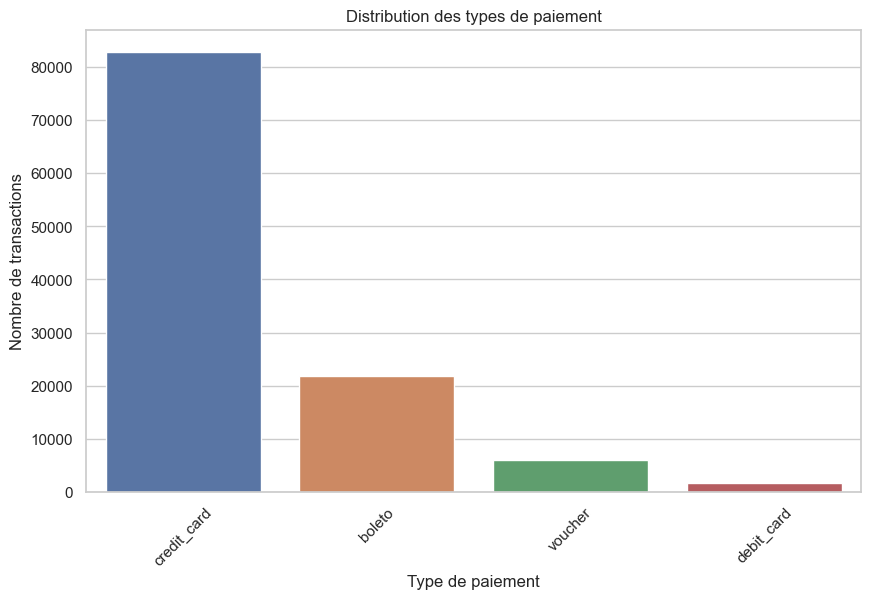

In [105]:
# Tri des valeurs et récupération des 10 premières
top_categorie = Nombre_categorie.sort_values(ascending=False).head(10)

# Création du graphique à barres
plt.figure(figsize=(12, 8))  # Ajustez la taille du graphique pour une meilleure visibilité
top_categorie.plot(kind='bar', color='DodgerBlue', width=0.8)  # Ajustez la largeur des barres ici
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour éviter qu'elles se chevauchent
plt.show()

# Compter les occurrences pour chaque catégorie
state_counts = data['customer_state'].value_counts()
payment_type_counts = data['payment_type'].value_counts()

# Visualiser les fréquences des états des clients
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Distribution des états des clients')
plt.xlabel('État')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.show()

# Visualiser les fréquences des types de paiement
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values)
plt.title('Distribution des types de paiement')
plt.xlabel('Type de paiement')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=45)
plt.show()

**Bilan**
*****
- ***Top 10 Product Categories: Ce graphique montre clairement que les catégories 'bed_bath_table' et 'health_beauty' dominent les ventes, suivies de près par 'sports_leisure' et 'furniture_decor'.***
*****

- ***Distribution des états des clients: La majorité des clients proviennent de l'État de São Paulo (SP), suivi par Rio de Janeiro (RJ) et Minas Gerais (MG), ce qui montre une concentration géographique des acheteurs dans les zones urbaines les plus densément peuplées du Brésil.***
*****

- ***Distribution des types de paiement: Le graphique révèle une préférence écrasante pour le paiement par carte de crédit, suivi à distance par les options de billet bancaire (boleto) et de voucher, illustrant la dominance et la confiance dans les paiements numériques sécurisés.***

### <a name="C17"><span style='background:PowderBlue'>5.2 Analyse multivariée</span>

#### <font color='blue'>***Créons une Heatmap des corrélations pour identifier les relations entre les variables quantitatives et supprimer les variables fortement liées.***

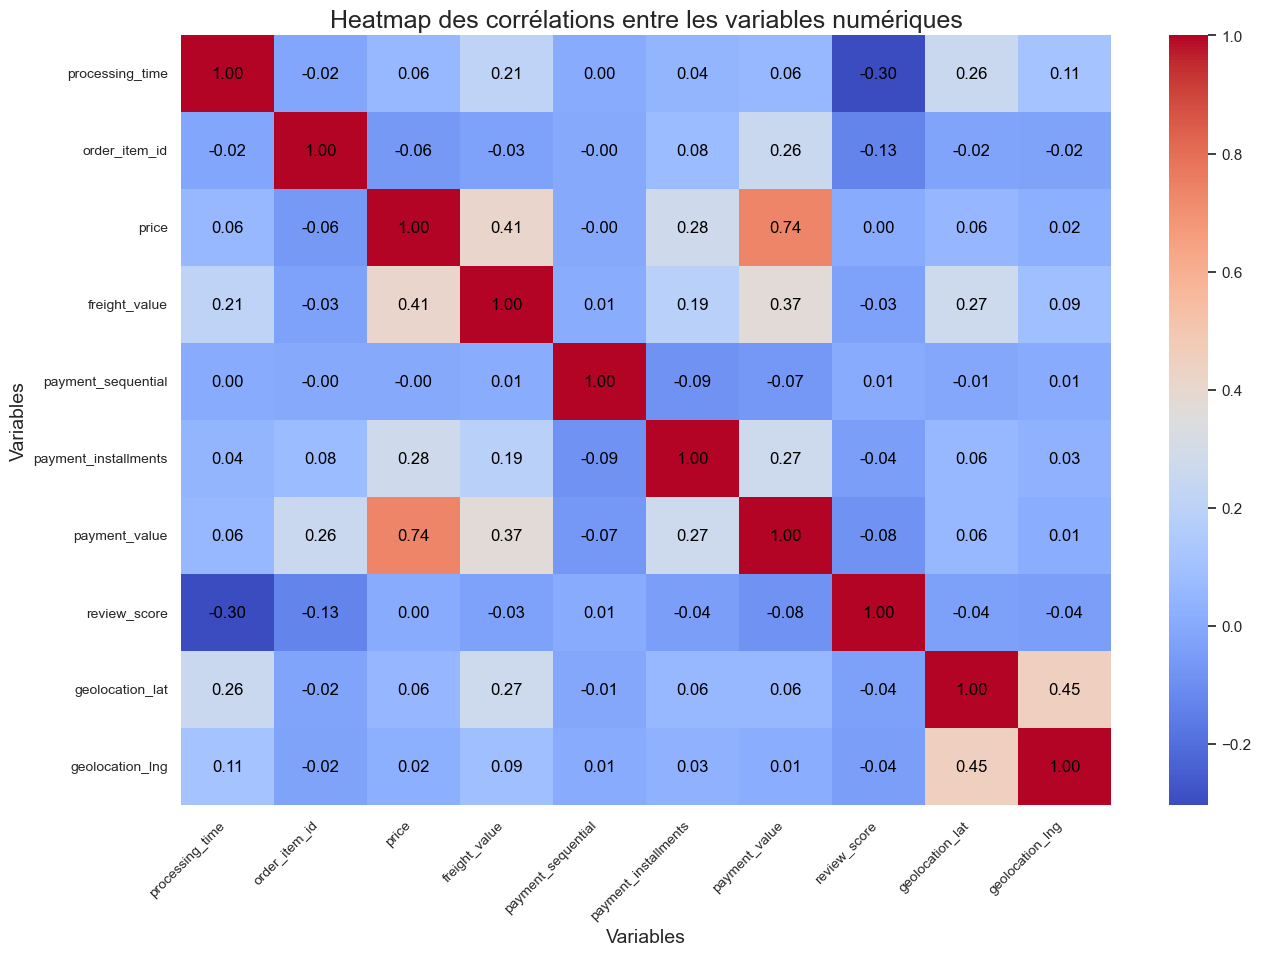

In [106]:
# Sélection des colonnes numériques pour la matrice de corrélation
numeric_data = data.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation sur les colonnes numériques
correlation_matrix = numeric_data.corr()

# Génération d'une heatmap pour visualiser les corrélations
plt.figure(figsize=(15, 10)) 

# Création de la heatmap sans annotations
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', cbar=True)

# Ajouter les annotations manuellement
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = plt.text(j+0.5, i+0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                        ha="center", va="center", color="black")

# Ajout des titres pour les axes et un titre général
plt.title('Heatmap des corrélations entre les variables numériques', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Rotation des étiquettes de l'axe x pour éviter le chevauchement
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

# Afficher la figure ajustée
plt.show()

- ***il y a une corrélation forte entre le payment_value et price (prix).***

#### <a name="C30"><font color='indianred'> Corrélation entre variable quantitative et variable qualitative</a>

In [107]:
# ANOVA
model = ols('review_score ~ C(customer_state)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Affichage de la table ANOVA
print(anova_table)

                         sum_sq        df          F         PR(>F)
C(customer_state)    1590.88676      26.0  34.017963  5.388960e-169
Residual           202112.20475  112366.0        NaN            NaN


- ***L'analyse ANOVA indique que les scores de revue varient significativement entre les différents états, avec une P-value extrêmement faible, suggérant que l'expérience client diffère considérablement à travers les régions.***

#### <a name="C30"><font color='indianred'> Variables qualitatives</a>

In [108]:
# Création de la table de contingence
contingency_table = pd.crosstab(data['payment_type'], data['product_category_name_english'])

# Application du test Chi-carré
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Calcul de la valeur critique
alpha = 0.05  # Niveau de significativité
critical_value = chi2.ppf(1 - alpha, dof)

# Affichage formaté des résultats
print(f"Chi2 Stat: {chi2_stat:.5f}")
print(f"P-value: {p_value:.5g}")  # '5g' pour une précision scientifique adaptée
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value: {critical_value:.5f}")

# Interprétation du test
if p_value <= alpha:
    print("Variables non indépendantes (H0 rejetée) car p_value <= alpha.")
    print("Les deux variables sont dépendantes et apportent des informations différentes.")
else:
    print("Variables indépendantes (H0 non rejetée).")

Chi2 Stat: 1420.58684
P-value: 1.3454e-178
Degrees of Freedom: 210
Critical Value: 244.80764
Variables non indépendantes (H0 rejetée) car p_value <= alpha.
Les deux variables sont dépendantes et apportent des informations différentes.


# <a name="C18"><font color='RoyalBlue'>6. Export des données</a>

In [109]:
# Exporter le dataframe nettoyé pour le travail de segmentation
data.to_csv('data_cleaned_for_segmentation.csv', index=False)

print("Dataframe exporté avec succès.")

Dataframe exporté avec succès.
